# CPD using TIRE

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Lambda, Input, Dense
from tensorflow.keras.models import Model

import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_prominences
import warnings
import time, copy

import utils
import TIRE
import simulate

In [11]:
# Load data
timeseries = np.loadtxt("./data/PAMAP2.csv", delimiter=",")#pd.read_csv('data/MoCap/4d/amc_86_02.4d', sep=' ').to_numpy()
#data = StandardScaler().fit_transform(data)
timeseries = timeseries.T

In [13]:
len(timeseries)

376417

In [ ]:
timeseries = data[0]

In [ ]:
timeseries.shape

In [102]:
data.shape

(40, 376417)

In [9]:
labels = np.loadtxt("./data/PAMAP2_labels.csv", delimiter=",")
ground_truth = np.where(labels[:-1] != labels[1:])[0]

In [91]:
windows = utils.ts_to_windows(timeseries, 0, window_size, stride=1)
windows = utils.minmaxscale(windows,-1,1)
#windows = utils.combine_ts(windows)
windows_TD = windows

In [92]:
windows_TD.shape

(376368, 50)

In [3]:
window_size = 150
domain = "both" #choose from: TD (time domain), FD (frequency domain) or both

#parameters TD
intermediate_dim_TD=0
latent_dim_TD=1 #h^TD in paper
nr_shared_TD=1 #s^TD in paper
K_TD = 2 #as in paper
nr_ae_TD= K_TD+1 #number of parallel AEs = K+1
loss_weight_TD=1 #lambda_TD in paper

#parameters FD
intermediate_dim_FD=10
latent_dim_FD=1 #h^FD in paper
nr_shared_FD=1 #s^FD in paper
K_FD = 2 #as in paper
nr_ae_FD=K_FD+1 #number of parallel AEs = K+1
loss_weight_FD=1 #lambda^FD in paper
nfft = 30 #number of points for DFT
norm_mode = "timeseries" #for calculation of DFT, should the timeseries have mean zero or each window?

In [6]:
change_points = []
disses = []
for i in range(len(data)):
    timeseries = data[i]
    windows = utils.ts_to_windows(timeseries, 0, window_size, stride=1)
    windows = utils.minmaxscale(windows,-1,1)
    windows_TD = windows
    windows_FD = utils.calc_fft(windows_TD, nfft, norm_mode)
    shared_features_TD = TIRE.train_AE(windows_TD, intermediate_dim_TD, latent_dim_TD, nr_shared_TD, nr_ae_TD, loss_weight_TD)
    shared_features_FD = TIRE.train_AE(windows_FD, intermediate_dim_FD, latent_dim_FD, nr_shared_FD, nr_ae_FD, loss_weight_FD)
    dissimilarities = TIRE.smoothened_dissimilarity_measures(shared_features_TD, shared_features_FD, domain, window_size)
    disses.append(dissimilarities)
    change_point_scores = TIRE.change_point_score(dissimilarities, window_size)
    change_points.append(change_point_scores)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3, 150)]     0           []                               
                                                                                                  
 dense (Dense)                  (None, 3, 1)         151         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 3, 0)         0           ['input_1[0][0]']                
                                                                                                  
 tf.concat (TFOpLambda)         (None, 3, 1)         0           ['dense[0][0]',                  
                                                                  'dense_1[0][0]']            

5880/5880 [==============================] - 4s 656us/step - loss: 0.0025
Epoch 170/200
5880/5880 [==============================] - 4s 663us/step - loss: 0.0025
Epoch 171/200
5880/5880 [==============================] - 4s 658us/step - loss: 0.0026
Epoch 172/200
5880/5880 [==============================] - 4s 659us/step - loss: 0.0025
Epoch 173/200
5880/5880 [==============================] - 4s 667us/step - loss: 0.0025
Epoch 174/200
5880/5880 [==============================] - 4s 660us/step - loss: 0.0025
Epoch 175/200
5880/5880 [==============================] - 4s 661us/step - loss: 0.0025
Epoch 176/200
5880/5880 [==============================] - 4s 663us/step - loss: 0.0025
Epoch 177/200
5880/5880 [==============================] - 4s 667us/step - loss: 0.0025
Epoch 178/200
5880/5880 [==============================] - 4s 662us/step - loss: 0.0025
Epoch 179/200
5880/5880 [==============================] - 4s 664us/step - loss: 0.0025
Epoch 180/200
5880/5880 [=====================

5880/5880 [==============================] - 4s 669us/step - loss: 2.7338e-05
Epoch 38/200
5880/5880 [==============================] - 4s 640us/step - loss: 2.7360e-05
Epoch 39/200
5880/5880 [==============================] - 4s 668us/step - loss: 2.6823e-05
Epoch 40/200
5880/5880 [==============================] - 4s 648us/step - loss: 2.6818e-05
Epoch 41/200
5880/5880 [==============================] - 4s 633us/step - loss: 2.6705e-05
Epoch 42/200
5880/5880 [==============================] - 4s 634us/step - loss: 2.6647e-05
Epoch 43/200
5880/5880 [==============================] - 4s 632us/step - loss: 2.6581e-05
Epoch 44/200
5880/5880 [==============================] - 4s 624us/step - loss: 2.6496e-05
Epoch 45/200
5880/5880 [==============================] - 4s 619us/step - loss: 2.6352e-05
Epoch 46/200
5880/5880 [==============================] - 4s 628us/step - loss: 2.6398e-05
Epoch 47/200
5880/5880 [==============================] - 4s 656us/step - loss: 2.6258e-05
Epoch 48/200

                                                                                                  
Total params: 451
Trainable params: 451
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/200
5880/5880 [==============================] - 4s 695us/step - loss: 0.0401
Epoch 2/200
5880/5880 [==============================] - 4s 713us/step - loss: 0.0062
Epoch 3/200
5880/5880 [==============================] - 4s 697us/step - loss: 0.0051
Epoch 4/200
5880/5880 [==============================] - 4s 710us/step - loss: 0.0048
Epoch 5/200
5880/5880 [==============================] - 4s 701us/step - loss: 0.0047
Epoch 6/200
5880/5880 [==============================] - 4s 690us/step - loss: 0.0047
Epoch 7/200
5880/5880 [==============================] - 4s 704us/step - loss: 0.0046
Epoch 8/200
5880/5880 [==============================] - 4s 726us/step - loss: 0.0046
Epoch 9/200
5880/5880 [===========================

5880/5880 [==============================] - 4s 693us/step - loss: 0.0044
Epoch 92/200
5880/5880 [==============================] - 4s 677us/step - loss: 0.0045
Epoch 93/200
5880/5880 [==============================] - 4s 679us/step - loss: 0.0044
Epoch 94/200
5880/5880 [==============================] - 4s 677us/step - loss: 0.0045
Epoch 95/200
5880/5880 [==============================] - 4s 678us/step - loss: 0.0045
Epoch 96/200
5880/5880 [==============================] - 4s 682us/step - loss: 0.0044
Epoch 97/200
5880/5880 [==============================] - 4s 682us/step - loss: 0.0045
Epoch 98/200
5880/5880 [==============================] - 4s 691us/step - loss: 0.0045
Epoch 99/200
5880/5880 [==============================] - 4s 681us/step - loss: 0.0045
Epoch 100/200
5880/5880 [==============================] - 4s 687us/step - loss: 0.0045
Epoch 101/200
5880/5880 [==============================] - 4s 690us/step - loss: 0.0045
Epoch 102/200
5880/5880 [=============================

5880/5880 [==============================] - 4s 625us/step - loss: 4.3424e-06
Epoch 52/200
5880/5880 [==============================] - 4s 629us/step - loss: 4.3114e-06
Epoch 53/200
5880/5880 [==============================] - 4s 611us/step - loss: 4.3304e-06
Epoch 54/200
5880/5880 [==============================] - 4s 625us/step - loss: 4.3408e-06
Epoch 55/200
5880/5880 [==============================] - 4s 622us/step - loss: 4.2932e-06
Epoch 56/200
5880/5880 [==============================] - 4s 620us/step - loss: 4.2450e-06
Epoch 57/200
5880/5880 [==============================] - 4s 624us/step - loss: 4.2465e-06
Epoch 58/200
5880/5880 [==============================] - 4s 624us/step - loss: 4.2440e-06
Epoch 59/200
5880/5880 [==============================] - 4s 622us/step - loss: 4.2036e-06
Epoch 60/200
5880/5880 [==============================] - 4s 623us/step - loss: 4.2281e-06
Epoch 61/200
5880/5880 [==============================] - 4s 624us/step - loss: 4.1759e-06
Epoch 62/200

5880/5880 [==============================] - 4s 680us/step - loss: 0.0028
Epoch 12/200
5880/5880 [==============================] - 4s 682us/step - loss: 0.0028
Epoch 13/200
5880/5880 [==============================] - 4s 682us/step - loss: 0.0028
Epoch 14/200
5880/5880 [==============================] - 4s 679us/step - loss: 0.0028
Epoch 15/200
5880/5880 [==============================] - 4s 679us/step - loss: 0.0028
Epoch 16/200
5880/5880 [==============================] - 4s 681us/step - loss: 0.0028
Epoch 17/200
5880/5880 [==============================] - 4s 682us/step - loss: 0.0028
Epoch 18/200
5880/5880 [==============================] - 4s 681us/step - loss: 0.0028
Epoch 19/200
5880/5880 [==============================] - 4s 682us/step - loss: 0.0028
Epoch 20/200
5880/5880 [==============================] - 4s 685us/step - loss: 0.0028
Epoch 21/200
5880/5880 [==============================] - 4s 681us/step - loss: 0.0028
Epoch 22/200
5880/5880 [==============================] 

5880/5880 [==============================] - 4s 679us/step - loss: 0.0028
Epoch 199/200
5880/5880 [==============================] - 4s 682us/step - loss: 0.0028
Epoch 200/200
11759/11759 [==============================] - 5s 451us/step
Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 3, 16)]      0           []                               
                                                                                                  
 dense_19 (Dense)               (None, 3, 10)        170         ['input_11[0][0]']               
                                                                                                  
 dense_20 (Dense)               (None, 3, 1)         11          ['dense_19[0][0]']               
                                                    

Epoch 68/200
5880/5880 [==============================] - 4s 598us/step - loss: 0.0027
Epoch 69/200
5880/5880 [==============================] - 4s 604us/step - loss: 0.0027
Epoch 70/200
5880/5880 [==============================] - 4s 605us/step - loss: 0.0027
Epoch 71/200
5880/5880 [==============================] - 4s 608us/step - loss: 0.0027
Epoch 72/200
5880/5880 [==============================] - 4s 605us/step - loss: 0.0027
Epoch 73/200
5880/5880 [==============================] - 4s 598us/step - loss: 0.0027
Epoch 74/200
5880/5880 [==============================] - 4s 603us/step - loss: 0.0027
Epoch 75/200
5880/5880 [==============================] - 4s 602us/step - loss: 0.0026
Epoch 76/200
5880/5880 [==============================] - 4s 602us/step - loss: 0.0026
Epoch 77/200
5880/5880 [==============================] - 4s 602us/step - loss: 0.0026
Epoch 78/200
5880/5880 [==============================] - 4s 599us/step - loss: 0.0026
Epoch 79/200
5880/5880 [===================

5880/5880 [==============================] - 4s 684us/step - loss: 0.0022
Epoch 36/200
5880/5880 [==============================] - 4s 690us/step - loss: 0.0022
Epoch 37/200
5880/5880 [==============================] - 4s 712us/step - loss: 0.0022
Epoch 38/200
5880/5880 [==============================] - 4s 688us/step - loss: 0.0022
Epoch 39/200
5880/5880 [==============================] - 4s 695us/step - loss: 0.0022
Epoch 40/200
5880/5880 [==============================] - 4s 687us/step - loss: 0.0022
Epoch 41/200
5880/5880 [==============================] - 4s 684us/step - loss: 0.0022
Epoch 42/200
5880/5880 [==============================] - 4s 685us/step - loss: 0.0022
Epoch 43/200
5880/5880 [==============================] - 4s 696us/step - loss: 0.0022
Epoch 44/200
5880/5880 [==============================] - 4s 690us/step - loss: 0.0022
Epoch 45/200
5880/5880 [==============================] - 4s 680us/step - loss: 0.0022
Epoch 46/200
5880/5880 [==============================] 

Epoch 129/200
5880/5880 [==============================] - 4s 684us/step - loss: 0.0022
Epoch 130/200
5880/5880 [==============================] - 4s 691us/step - loss: 0.0022
Epoch 131/200
5880/5880 [==============================] - 4s 683us/step - loss: 0.0022
Epoch 132/200
5880/5880 [==============================] - 4s 689us/step - loss: 0.0022
Epoch 133/200
5880/5880 [==============================] - 4s 693us/step - loss: 0.0022
Epoch 134/200
5880/5880 [==============================] - 4s 688us/step - loss: 0.0022
Epoch 135/200
5880/5880 [==============================] - 4s 682us/step - loss: 0.0022
Epoch 136/200
5880/5880 [==============================] - 4s 689us/step - loss: 0.0022
Epoch 137/200
5880/5880 [==============================] - 4s 690us/step - loss: 0.0022
Epoch 138/200
5880/5880 [==============================] - 4s 686us/step - loss: 0.0022
Epoch 139/200
5880/5880 [==============================] - 4s 683us/step - loss: 0.0022
Epoch 140/200
5880/5880 [=======

Total params: 377
Trainable params: 377
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/200
5880/5880 [==============================] - 4s 611us/step - loss: 0.0223
Epoch 2/200
5880/5880 [==============================] - 4s 608us/step - loss: 0.0039
Epoch 3/200
5880/5880 [==============================] - 4s 604us/step - loss: 0.0038
Epoch 4/200
5880/5880 [==============================] - 4s 608us/step - loss: 0.0037
Epoch 5/200
5880/5880 [==============================] - 4s 608us/step - loss: 0.0033
Epoch 6/200
5880/5880 [==============================] - 4s 610us/step - loss: 0.0032
Epoch 7/200
5880/5880 [==============================] - 4s 605us/step - loss: 0.0031
Epoch 8/200
5880/5880 [==============================] - 4s 603us/step - loss: 0.0031
Epoch 9/200
5880/5880 [==============================] - 4s 608us/step - loss: 0.0031
Epoch 10/200
5880/5880 [==============================] - 4s 61

5880/5880 [==============================] - 4s 600us/step - loss: 0.0018
Epoch 186/200
5880/5880 [==============================] - 4s 606us/step - loss: 0.0018
Epoch 187/200
5880/5880 [==============================] - 4s 605us/step - loss: 0.0018
Epoch 188/200
5880/5880 [==============================] - 4s 606us/step - loss: 0.0018
Epoch 189/200
5880/5880 [==============================] - 4s 600us/step - loss: 0.0018
Epoch 190/200
5880/5880 [==============================] - 4s 608us/step - loss: 0.0018
Epoch 191/200
5880/5880 [==============================] - 4s 605us/step - loss: 0.0018
Epoch 192/200
5880/5880 [==============================] - 4s 602us/step - loss: 0.0018
Epoch 193/200
5880/5880 [==============================] - 4s 605us/step - loss: 0.0018
Epoch 194/200
5880/5880 [==============================] - 4s 606us/step - loss: 0.0018
Epoch 195/200
5880/5880 [==============================] - 4s 607us/step - loss: 0.0018
Epoch 196/200
5880/5880 [=====================

5880/5880 [==============================] - 4s 684us/step - loss: 6.2834e-04
Epoch 146/200
5880/5880 [==============================] - 4s 683us/step - loss: 6.2841e-04
Epoch 147/200
5880/5880 [==============================] - 4s 682us/step - loss: 6.2832e-04
Epoch 148/200
5880/5880 [==============================] - 4s 681us/step - loss: 6.2833e-04
Epoch 149/200
5880/5880 [==============================] - 4s 681us/step - loss: 6.2835e-04
Epoch 150/200
5880/5880 [==============================] - 4s 682us/step - loss: 6.2842e-04
Epoch 151/200
5880/5880 [==============================] - 4s 681us/step - loss: 6.2850e-04
Epoch 152/200
5880/5880 [==============================] - 4s 682us/step - loss: 6.2845e-04
Epoch 153/200
5880/5880 [==============================] - 4s 683us/step - loss: 6.2833e-04
Epoch 154/200
5880/5880 [==============================] - 4s 683us/step - loss: 6.2854e-04
Epoch 155/200
5880/5880 [==============================] - 4s 683us/step - loss: 6.2837e-04
Ep

5880/5880 [==============================] - 4s 614us/step - loss: 9.6697e-04
Epoch 106/200
5880/5880 [==============================] - 4s 621us/step - loss: 9.5938e-04
Epoch 107/200
5880/5880 [==============================] - 4s 623us/step - loss: 9.5207e-04
Epoch 108/200
5880/5880 [==============================] - 4s 619us/step - loss: 9.4783e-04
Epoch 109/200
5880/5880 [==============================] - 4s 626us/step - loss: 9.4383e-04
Epoch 110/200
5880/5880 [==============================] - 4s 624us/step - loss: 9.4005e-04
Epoch 111/200
5880/5880 [==============================] - 4s 619us/step - loss: 9.3756e-04
Epoch 112/200
5880/5880 [==============================] - 4s 619us/step - loss: 9.3557e-04
Epoch 113/200
5880/5880 [==============================] - 4s 620us/step - loss: 9.3334e-04
Epoch 114/200
5880/5880 [==============================] - 4s 619us/step - loss: 9.3181e-04
Epoch 115/200
5880/5880 [==============================] - 4s 620us/step - loss: 9.2961e-04
Ep

5880/5880 [==============================] - 4s 683us/step - loss: 0.0115
Epoch 69/200
5880/5880 [==============================] - 4s 682us/step - loss: 0.0115
Epoch 70/200
5880/5880 [==============================] - 4s 683us/step - loss: 0.0115
Epoch 71/200
5880/5880 [==============================] - 4s 686us/step - loss: 0.0115
Epoch 72/200
5880/5880 [==============================] - 4s 682us/step - loss: 0.0115
Epoch 73/200
5880/5880 [==============================] - 4s 682us/step - loss: 0.0115
Epoch 74/200
5880/5880 [==============================] - 4s 682us/step - loss: 0.0115
Epoch 75/200
5880/5880 [==============================] - 4s 683us/step - loss: 0.0115
Epoch 76/200
5880/5880 [==============================] - 4s 680us/step - loss: 0.0115
Epoch 77/200
5880/5880 [==============================] - 4s 683us/step - loss: 0.0115
Epoch 78/200
5880/5880 [==============================] - 4s 683us/step - loss: 0.0115
Epoch 79/200
5880/5880 [==============================] 

5880/5880 [==============================] - 4s 613us/step - loss: 0.0027
Epoch 31/200
5880/5880 [==============================] - 4s 616us/step - loss: 0.0027
Epoch 32/200
5880/5880 [==============================] - 4s 613us/step - loss: 0.0027
Epoch 33/200
5880/5880 [==============================] - 4s 612us/step - loss: 0.0027
Epoch 34/200
5880/5880 [==============================] - 4s 613us/step - loss: 0.0027
Epoch 35/200
5880/5880 [==============================] - 4s 614us/step - loss: 0.0027
Epoch 36/200
5880/5880 [==============================] - 4s 615us/step - loss: 0.0027
Epoch 37/200
5880/5880 [==============================] - 4s 616us/step - loss: 0.0027
Epoch 38/200
5880/5880 [==============================] - 4s 611us/step - loss: 0.0027
Epoch 39/200
5880/5880 [==============================] - 4s 615us/step - loss: 0.0027
Epoch 40/200
5880/5880 [==============================] - 4s 616us/step - loss: 0.0027
Epoch 41/200
5880/5880 [==============================] 

5880/5880 [==============================] - 4s 609us/step - loss: 0.0026
Epoch 125/200
5880/5880 [==============================] - 4s 619us/step - loss: 0.0026
Epoch 126/200
5880/5880 [==============================] - 4s 617us/step - loss: 0.0026
Epoch 127/200
5880/5880 [==============================] - 4s 617us/step - loss: 0.0026
Epoch 128/200
5880/5880 [==============================] - 4s 618us/step - loss: 0.0026
Epoch 129/200
5880/5880 [==============================] - 4s 619us/step - loss: 0.0026
Epoch 130/200
5880/5880 [==============================] - 4s 619us/step - loss: 0.0026
Epoch 131/200
5880/5880 [==============================] - 4s 612us/step - loss: 0.0026
Epoch 132/200
5880/5880 [==============================] - 4s 602us/step - loss: 0.0026
Epoch 133/200
5880/5880 [==============================] - 4s 611us/step - loss: 0.0026
Epoch 134/200
5880/5880 [==============================] - 4s 613us/step - loss: 0.0026
Epoch 135/200
5880/5880 [=====================

Total params: 451
Trainable params: 451
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/200
5880/5880 [==============================] - 4s 674us/step - loss: 0.0072
Epoch 2/200
5880/5880 [==============================] - 4s 674us/step - loss: 0.0071
Epoch 3/200
5880/5880 [==============================] - 4s 673us/step - loss: 0.0071
Epoch 4/200
5880/5880 [==============================] - 4s 673us/step - loss: 0.0071
Epoch 5/200
5880/5880 [==============================] - 4s 672us/step - loss: 0.0071
Epoch 6/200
5880/5880 [==============================] - 4s 671us/step - loss: 0.0071
Epoch 7/200
5880/5880 [==============================] - 4s 673us/step - loss: 0.0071
Epoch 8/200
5880/5880 [==============================] - 4s 674us/step - loss: 0.0071
Epoch 9/200
5880/5880 [==============================] - 4s 670us/step - loss: 0.0071
Epoch 10/200
5880/5880 [==============================] - 4s 67

5880/5880 [==============================] - 4s 674us/step - loss: 0.0071
Epoch 186/200
5880/5880 [==============================] - 4s 673us/step - loss: 0.0071
Epoch 187/200
5880/5880 [==============================] - 4s 670us/step - loss: 0.0071
Epoch 188/200
5880/5880 [==============================] - 4s 673us/step - loss: 0.0071
Epoch 189/200
5880/5880 [==============================] - 4s 673us/step - loss: 0.0071
Epoch 190/200
5880/5880 [==============================] - 4s 673us/step - loss: 0.0071
Epoch 191/200
5880/5880 [==============================] - 4s 672us/step - loss: 0.0071
Epoch 192/200
5880/5880 [==============================] - 4s 669us/step - loss: 0.0071
Epoch 193/200
5880/5880 [==============================] - 4s 676us/step - loss: 0.0071
Epoch 194/200
5880/5880 [==============================] - 4s 672us/step - loss: 0.0071
Epoch 195/200
5880/5880 [==============================] - 4s 673us/step - loss: 0.0071
Epoch 196/200
5880/5880 [=====================

5880/5880 [==============================] - 4s 615us/step - loss: 0.0018
Epoch 148/200
5880/5880 [==============================] - 4s 615us/step - loss: 0.0018
Epoch 149/200
5880/5880 [==============================] - 4s 617us/step - loss: 0.0018
Epoch 150/200
5880/5880 [==============================] - 4s 618us/step - loss: 0.0018
Epoch 151/200
5880/5880 [==============================] - 4s 612us/step - loss: 0.0018
Epoch 152/200
5880/5880 [==============================] - 4s 615us/step - loss: 0.0018
Epoch 153/200
5880/5880 [==============================] - 4s 613us/step - loss: 0.0018
Epoch 154/200
5880/5880 [==============================] - 4s 619us/step - loss: 0.0018
Epoch 155/200
5880/5880 [==============================] - 4s 619us/step - loss: 0.0018
Epoch 156/200
5880/5880 [==============================] - 4s 615us/step - loss: 0.0018
Epoch 157/200
5880/5880 [==============================] - 4s 616us/step - loss: 0.0018
Epoch 158/200
5880/5880 [=====================

Epoch 21/200
5880/5880 [==============================] - 4s 695us/step - loss: 0.0029
Epoch 22/200
5880/5880 [==============================] - 4s 693us/step - loss: 0.0029
Epoch 23/200
5880/5880 [==============================] - 4s 694us/step - loss: 0.0029
Epoch 24/200
5880/5880 [==============================] - 4s 693us/step - loss: 0.0029
Epoch 25/200
5880/5880 [==============================] - 4s 694us/step - loss: 0.0029
Epoch 26/200
5880/5880 [==============================] - 4s 697us/step - loss: 0.0029
Epoch 27/200
5880/5880 [==============================] - 4s 694us/step - loss: 0.0029
Epoch 28/200
5880/5880 [==============================] - 4s 692us/step - loss: 0.0029
Epoch 29/200
5880/5880 [==============================] - 4s 693us/step - loss: 0.0029
Epoch 30/200
5880/5880 [==============================] - 4s 693us/step - loss: 0.0029
Epoch 31/200
5880/5880 [==============================] - 4s 692us/step - loss: 0.0029
Epoch 32/200
5880/5880 [===================

Epoch 115/200
5880/5880 [==============================] - 4s 690us/step - loss: 0.0029
Epoch 116/200
5880/5880 [==============================] - 4s 688us/step - loss: 0.0029
Epoch 117/200
5880/5880 [==============================] - 4s 689us/step - loss: 0.0029
Epoch 118/200
5880/5880 [==============================] - 4s 693us/step - loss: 0.0029
Epoch 119/200
5880/5880 [==============================] - 4s 688us/step - loss: 0.0029
Epoch 120/200
5880/5880 [==============================] - 4s 690us/step - loss: 0.0029
Epoch 121/200
5880/5880 [==============================] - 4s 692us/step - loss: 0.0029
Epoch 122/200
5880/5880 [==============================] - 4s 691us/step - loss: 0.0029
Epoch 123/200
5880/5880 [==============================] - 4s 690us/step - loss: 0.0029
Epoch 124/200
5880/5880 [==============================] - 4s 688us/step - loss: 0.0029
Epoch 125/200
5880/5880 [==============================] - 4s 691us/step - loss: 0.0029
Epoch 126/200
5880/5880 [=======

                                                                                                  
 dense_60 (Dense)               (None, 3, 1)         11          ['dense_59[0][0]']               
                                                                                                  
 dense_61 (Dense)               (None, 3, 0)         0           ['dense_59[0][0]']               
                                                                                                  
 tf.concat_15 (TFOpLambda)      (None, 3, 1)         0           ['dense_60[0][0]',               
                                                                  'dense_61[0][0]']               
                                                                                                  
 dense_62 (Dense)               (None, 3, 10)        20          ['tf.concat_15[0][0]']           
                                                                                                  
 dense_63 

5880/5880 [==============================] - 4s 612us/step - loss: 7.4163e-04
Epoch 166/200
5880/5880 [==============================] - 4s 615us/step - loss: 7.3530e-04
Epoch 167/200
5880/5880 [==============================] - 4s 611us/step - loss: 7.3715e-04
Epoch 168/200
5880/5880 [==============================] - 4s 606us/step - loss: 7.3554e-04
Epoch 169/200
5880/5880 [==============================] - 4s 605us/step - loss: 7.3537e-04
Epoch 170/200
5880/5880 [==============================] - 4s 623us/step - loss: 7.3486e-04
Epoch 171/200
5880/5880 [==============================] - 4s 619us/step - loss: 7.3172e-04
Epoch 172/200
5880/5880 [==============================] - 4s 619us/step - loss: 7.3242e-04
Epoch 173/200
5880/5880 [==============================] - 4s 623us/step - loss: 7.3138e-04
Epoch 174/200
5880/5880 [==============================] - 4s 619us/step - loss: 7.3103e-04
Epoch 175/200
5880/5880 [==============================] - 4s 616us/step - loss: 7.3275e-04
Ep

Epoch 131/200
5880/5880 [==============================] - 4s 684us/step - loss: 0.0052
Epoch 132/200
5880/5880 [==============================] - 4s 686us/step - loss: 0.0052
Epoch 133/200
5880/5880 [==============================] - 4s 687us/step - loss: 0.0052
Epoch 134/200
5880/5880 [==============================] - 4s 685us/step - loss: 0.0052
Epoch 135/200
5880/5880 [==============================] - 4s 687us/step - loss: 0.0052
Epoch 136/200
5880/5880 [==============================] - 4s 685us/step - loss: 0.0052
Epoch 137/200
5880/5880 [==============================] - 4s 685us/step - loss: 0.0052
Epoch 138/200
5880/5880 [==============================] - 4s 683us/step - loss: 0.0052
Epoch 139/200
5880/5880 [==============================] - 4s 685us/step - loss: 0.0052
Epoch 140/200
5880/5880 [==============================] - 4s 687us/step - loss: 0.0052
Epoch 141/200
5880/5880 [==============================] - 4s 685us/step - loss: 0.0052
Epoch 142/200
5880/5880 [=======

Epoch 1/200
5880/5880 [==============================] - 4s 620us/step - loss: 0.0195
Epoch 2/200
5880/5880 [==============================] - 4s 615us/step - loss: 0.0013
Epoch 3/200
5880/5880 [==============================] - 4s 617us/step - loss: 8.6530e-04
Epoch 4/200
5880/5880 [==============================] - 4s 618us/step - loss: 8.2599e-04
Epoch 5/200
5880/5880 [==============================] - 4s 615us/step - loss: 8.1546e-04
Epoch 6/200
5880/5880 [==============================] - 4s 608us/step - loss: 8.1039e-04
Epoch 7/200
5880/5880 [==============================] - 4s 611us/step - loss: 8.0710e-04
Epoch 8/200
5880/5880 [==============================] - 4s 616us/step - loss: 8.0494e-04
Epoch 9/200
5880/5880 [==============================] - 4s 614us/step - loss: 8.0363e-04
Epoch 10/200
5880/5880 [==============================] - 4s 609us/step - loss: 8.0064e-04
Epoch 11/200
5880/5880 [==============================] - 4s 615us/step - loss: 7.9841e-04
Epoch 12/200
588

5880/5880 [==============================] - 4s 616us/step - loss: 7.3801e-04
Epoch 181/200
5880/5880 [==============================] - 4s 617us/step - loss: 7.3759e-04
Epoch 182/200
5880/5880 [==============================] - 4s 610us/step - loss: 7.3753e-04
Epoch 183/200
5880/5880 [==============================] - 4s 615us/step - loss: 7.3839e-04
Epoch 184/200
5880/5880 [==============================] - 4s 613us/step - loss: 7.3849e-04
Epoch 185/200
5880/5880 [==============================] - 4s 608us/step - loss: 7.3792e-04
Epoch 186/200
5880/5880 [==============================] - 4s 611us/step - loss: 7.3832e-04
Epoch 187/200
5880/5880 [==============================] - 4s 610us/step - loss: 7.3745e-04
Epoch 188/200
5880/5880 [==============================] - 4s 614us/step - loss: 7.3752e-04
Epoch 189/200
5880/5880 [==============================] - 4s 612us/step - loss: 7.3749e-04
Epoch 190/200
5880/5880 [==============================] - 4s 614us/step - loss: 7.3714e-04
Ep

5880/5880 [==============================] - 4s 691us/step - loss: 0.0024
Epoch 147/200
5880/5880 [==============================] - 4s 690us/step - loss: 0.0024
Epoch 148/200
5880/5880 [==============================] - 4s 691us/step - loss: 0.0024
Epoch 149/200
5880/5880 [==============================] - 4s 688us/step - loss: 0.0024
Epoch 150/200
5880/5880 [==============================] - 4s 690us/step - loss: 0.0024
Epoch 151/200
5880/5880 [==============================] - 4s 690us/step - loss: 0.0024
Epoch 152/200
5880/5880 [==============================] - 4s 690us/step - loss: 0.0024
Epoch 153/200
5880/5880 [==============================] - 4s 696us/step - loss: 0.0024
Epoch 154/200
5880/5880 [==============================] - 4s 693us/step - loss: 0.0024
Epoch 155/200
5880/5880 [==============================] - 4s 694us/step - loss: 0.0024
Epoch 156/200
5880/5880 [==============================] - 4s 696us/step - loss: 0.0024
Epoch 157/200
5880/5880 [=====================

5880/5880 [==============================] - 4s 619us/step - loss: 4.6293e-04
Epoch 105/200
5880/5880 [==============================] - 4s 617us/step - loss: 4.6310e-04
Epoch 106/200
5880/5880 [==============================] - 4s 620us/step - loss: 4.6320e-04
Epoch 107/200
5880/5880 [==============================] - 4s 621us/step - loss: 4.6296e-04
Epoch 108/200
5880/5880 [==============================] - 4s 620us/step - loss: 4.6323e-04
Epoch 109/200
5880/5880 [==============================] - 4s 617us/step - loss: 4.6321e-04
Epoch 110/200
5880/5880 [==============================] - 4s 620us/step - loss: 4.6319e-04
Epoch 111/200
5880/5880 [==============================] - 4s 620us/step - loss: 4.6302e-04
Epoch 112/200
5880/5880 [==============================] - 4s 621us/step - loss: 4.6330e-04
Epoch 113/200
5880/5880 [==============================] - 4s 621us/step - loss: 4.6315e-04
Epoch 114/200
5880/5880 [==============================] - 4s 612us/step - loss: 4.6317e-04
Ep

5880/5880 [==============================] - 4s 685us/step - loss: 0.0181
Epoch 68/200
5880/5880 [==============================] - 4s 686us/step - loss: 0.0181
Epoch 69/200
5880/5880 [==============================] - 4s 689us/step - loss: 0.0181
Epoch 70/200
5880/5880 [==============================] - 4s 687us/step - loss: 0.0181
Epoch 71/200
5880/5880 [==============================] - 4s 683us/step - loss: 0.0181
Epoch 72/200
5880/5880 [==============================] - 4s 682us/step - loss: 0.0181
Epoch 73/200
5880/5880 [==============================] - 4s 682us/step - loss: 0.0181
Epoch 74/200
5880/5880 [==============================] - 4s 685us/step - loss: 0.0181
Epoch 75/200
5880/5880 [==============================] - 4s 683us/step - loss: 0.0181
Epoch 76/200
5880/5880 [==============================] - 4s 686us/step - loss: 0.0181
Epoch 77/200
5880/5880 [==============================] - 4s 687us/step - loss: 0.0181
Epoch 78/200
5880/5880 [==============================] 

5880/5880 [==============================] - 4s 628us/step - loss: 0.0012
Epoch 30/200
5880/5880 [==============================] - 4s 625us/step - loss: 0.0012
Epoch 31/200
5880/5880 [==============================] - 4s 623us/step - loss: 0.0012
Epoch 32/200
5880/5880 [==============================] - 4s 625us/step - loss: 0.0012
Epoch 33/200
5880/5880 [==============================] - 4s 626us/step - loss: 0.0012
Epoch 34/200
5880/5880 [==============================] - 4s 622us/step - loss: 0.0012
Epoch 35/200
5880/5880 [==============================] - 4s 616us/step - loss: 0.0012
Epoch 36/200
5880/5880 [==============================] - 4s 620us/step - loss: 0.0012
Epoch 37/200
5880/5880 [==============================] - 4s 624us/step - loss: 0.0012
Epoch 38/200
5880/5880 [==============================] - 4s 618us/step - loss: 0.0012
Epoch 39/200
5880/5880 [==============================] - 4s 625us/step - loss: 0.0012
Epoch 40/200
5880/5880 [==============================] 

5880/5880 [==============================] - 4s 617us/step - loss: 0.0012
Epoch 124/200
5880/5880 [==============================] - 4s 613us/step - loss: 0.0012
Epoch 125/200
5880/5880 [==============================] - 4s 611us/step - loss: 0.0012
Epoch 126/200
5880/5880 [==============================] - 4s 613us/step - loss: 0.0012
Epoch 127/200
5880/5880 [==============================] - 4s 619us/step - loss: 0.0012
Epoch 128/200
5880/5880 [==============================] - 4s 623us/step - loss: 0.0012
Epoch 129/200
5880/5880 [==============================] - 4s 621us/step - loss: 0.0012
Epoch 130/200
5880/5880 [==============================] - 4s 621us/step - loss: 0.0012
Epoch 131/200
5880/5880 [==============================] - 4s 620us/step - loss: 0.0012
Epoch 132/200
5880/5880 [==============================] - 4s 619us/step - loss: 0.0012
Epoch 133/200
5880/5880 [==============================] - 4s 620us/step - loss: 0.0012
Epoch 134/200
5880/5880 [=====================

                                                                                                  
Total params: 451
Trainable params: 451
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/200
5880/5880 [==============================] - 4s 691us/step - loss: 0.0165
Epoch 2/200
5880/5880 [==============================] - 4s 691us/step - loss: 0.0119
Epoch 3/200
5880/5880 [==============================] - 4s 690us/step - loss: 0.0119
Epoch 4/200
5880/5880 [==============================] - 4s 689us/step - loss: 0.0118
Epoch 5/200
5880/5880 [==============================] - 4s 691us/step - loss: 0.0118
Epoch 6/200
5880/5880 [==============================] - 4s 690us/step - loss: 0.0118
Epoch 7/200
5880/5880 [==============================] - 4s 689us/step - loss: 0.0118
Epoch 8/200
5880/5880 [==============================] - 4s 689us/step - loss: 0.0118
Epoch 9/200
5880/5880 [===========================

5880/5880 [==============================] - 4s 688us/step - loss: 0.0117
Epoch 92/200
5880/5880 [==============================] - 4s 691us/step - loss: 0.0117
Epoch 93/200
5880/5880 [==============================] - 4s 693us/step - loss: 0.0117
Epoch 94/200
5880/5880 [==============================] - 4s 693us/step - loss: 0.0117
Epoch 95/200
5880/5880 [==============================] - 4s 692us/step - loss: 0.0117
Epoch 96/200
5880/5880 [==============================] - 4s 692us/step - loss: 0.0117
Epoch 97/200
5880/5880 [==============================] - 4s 692us/step - loss: 0.0117
Epoch 98/200
5880/5880 [==============================] - 4s 691us/step - loss: 0.0117
Epoch 99/200
5880/5880 [==============================] - 4s 692us/step - loss: 0.0117
Epoch 100/200
5880/5880 [==============================] - 4s 693us/step - loss: 0.0117
Epoch 101/200
5880/5880 [==============================] - 4s 689us/step - loss: 0.0117
Epoch 102/200
5880/5880 [=============================

5880/5880 [==============================] - 4s 622us/step - loss: 1.9751e-04
Epoch 52/200
5880/5880 [==============================] - 4s 625us/step - loss: 1.9746e-04
Epoch 53/200
5880/5880 [==============================] - 4s 623us/step - loss: 1.9742e-04
Epoch 54/200
5880/5880 [==============================] - 4s 627us/step - loss: 1.9731e-04
Epoch 55/200
5880/5880 [==============================] - 4s 628us/step - loss: 1.9726e-04
Epoch 56/200
5880/5880 [==============================] - 4s 627us/step - loss: 1.9727e-04
Epoch 57/200
5880/5880 [==============================] - 4s 621us/step - loss: 1.9721e-04
Epoch 58/200
5880/5880 [==============================] - 4s 616us/step - loss: 1.9728e-04
Epoch 59/200
5880/5880 [==============================] - 4s 625us/step - loss: 1.9719e-04
Epoch 60/200
5880/5880 [==============================] - 4s 627us/step - loss: 1.9710e-04
Epoch 61/200
5880/5880 [==============================] - 4s 627us/step - loss: 1.9711e-04
Epoch 62/200

5880/5880 [==============================] - 4s 686us/step - loss: 0.0091
Epoch 12/200
5880/5880 [==============================] - 4s 690us/step - loss: 0.0091
Epoch 13/200
5880/5880 [==============================] - 4s 688us/step - loss: 0.0091
Epoch 14/200
5880/5880 [==============================] - 4s 685us/step - loss: 0.0091
Epoch 15/200
5880/5880 [==============================] - 4s 687us/step - loss: 0.0091
Epoch 16/200
5880/5880 [==============================] - 4s 686us/step - loss: 0.0091
Epoch 17/200
5880/5880 [==============================] - 4s 688us/step - loss: 0.0091
Epoch 18/200
5880/5880 [==============================] - 4s 684us/step - loss: 0.0091
Epoch 19/200
5880/5880 [==============================] - 4s 686us/step - loss: 0.0091
Epoch 20/200
5880/5880 [==============================] - 4s 684us/step - loss: 0.0091
Epoch 21/200
5880/5880 [==============================] - 4s 685us/step - loss: 0.0091
Epoch 22/200
5880/5880 [==============================] 

5880/5880 [==============================] - 4s 698us/step - loss: 0.0091
Epoch 199/200
5880/5880 [==============================] - 4s 701us/step - loss: 0.0091
Epoch 200/200
11759/11759 [==============================] - 7s 509us/step
Model: "model_75"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_51 (InputLayer)          [(None, 3, 16)]      0           []                               
                                                                                                  
 dense_99 (Dense)               (None, 3, 10)        170         ['input_51[0][0]']               
                                                                                                  
 dense_100 (Dense)              (None, 3, 1)         11          ['dense_99[0][0]']               
                                                    

5880/5880 [==============================] - 4s 645us/step - loss: 1.6332e-04
Epoch 66/200
5880/5880 [==============================] - 4s 645us/step - loss: 1.6331e-04
Epoch 67/200
5880/5880 [==============================] - 4s 643us/step - loss: 1.6322e-04
Epoch 68/200
5880/5880 [==============================] - 4s 639us/step - loss: 1.6311e-04
Epoch 69/200
5880/5880 [==============================] - 4s 642us/step - loss: 1.6319e-04
Epoch 70/200
5880/5880 [==============================] - 4s 641us/step - loss: 1.6316e-04
Epoch 71/200
5880/5880 [==============================] - 4s 640us/step - loss: 1.6311e-04
Epoch 72/200
5880/5880 [==============================] - 4s 642us/step - loss: 1.6304e-04
Epoch 73/200
5880/5880 [==============================] - 4s 638us/step - loss: 1.6307e-04
Epoch 74/200
5880/5880 [==============================] - 4s 641us/step - loss: 1.6301e-04
Epoch 75/200
5880/5880 [==============================] - 4s 640us/step - loss: 1.6297e-04
Epoch 76/200

5880/5880 [==============================] - 4s 698us/step - loss: 0.0011
Epoch 26/200
5880/5880 [==============================] - 4s 700us/step - loss: 0.0011
Epoch 27/200
5880/5880 [==============================] - 4s 701us/step - loss: 0.0011
Epoch 28/200
5880/5880 [==============================] - 4s 700us/step - loss: 0.0011
Epoch 29/200
5880/5880 [==============================] - 4s 696us/step - loss: 0.0011
Epoch 30/200
5880/5880 [==============================] - 4s 698us/step - loss: 0.0011
Epoch 31/200
5880/5880 [==============================] - 4s 700us/step - loss: 0.0011
Epoch 32/200
5880/5880 [==============================] - 4s 701us/step - loss: 0.0011
Epoch 33/200
5880/5880 [==============================] - 4s 700us/step - loss: 0.0011
Epoch 34/200
5880/5880 [==============================] - 4s 700us/step - loss: 0.0011
Epoch 35/200
5880/5880 [==============================] - 4s 699us/step - loss: 0.0011
Epoch 36/200
5880/5880 [==============================] 

5880/5880 [==============================] - 4s 695us/step - loss: 0.0011
Epoch 120/200
5880/5880 [==============================] - 4s 697us/step - loss: 0.0011
Epoch 121/200
5880/5880 [==============================] - 4s 701us/step - loss: 0.0011
Epoch 122/200
5880/5880 [==============================] - 4s 698us/step - loss: 0.0011
Epoch 123/200
5880/5880 [==============================] - 4s 698us/step - loss: 0.0011
Epoch 124/200
5880/5880 [==============================] - 4s 700us/step - loss: 0.0011
Epoch 125/200
5880/5880 [==============================] - 4s 695us/step - loss: 0.0011
Epoch 126/200
5880/5880 [==============================] - 4s 698us/step - loss: 0.0011
Epoch 127/200
5880/5880 [==============================] - 4s 699us/step - loss: 0.0011
Epoch 128/200
5880/5880 [==============================] - 4s 703us/step - loss: 0.0011
Epoch 129/200
5880/5880 [==============================] - 4s 700us/step - loss: 0.0011
Epoch 130/200
5880/5880 [=====================

                                                                                                  
 tf.concat_27 (TFOpLambda)      (None, 3, 1)         0           ['dense_108[0][0]',              
                                                                  'dense_109[0][0]']              
                                                                                                  
 dense_110 (Dense)              (None, 3, 10)        20          ['tf.concat_27[0][0]']           
                                                                                                  
 dense_111 (Dense)              (None, 3, 16)        176         ['dense_110[0][0]']              
                                                                                                  
Total params: 377
Trainable params: 377
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/200
5880/5880 [======================

5880/5880 [==============================] - 4s 605us/step - loss: 5.5941e-05
Epoch 169/200
5880/5880 [==============================] - 4s 606us/step - loss: 5.6517e-05
Epoch 170/200
5880/5880 [==============================] - 4s 607us/step - loss: 5.6170e-05
Epoch 171/200
5880/5880 [==============================] - 4s 609us/step - loss: 5.6155e-05
Epoch 172/200
5880/5880 [==============================] - 4s 605us/step - loss: 5.5793e-05
Epoch 173/200
5880/5880 [==============================] - 4s 608us/step - loss: 5.6071e-05
Epoch 174/200
5880/5880 [==============================] - 4s 611us/step - loss: 5.6426e-05
Epoch 175/200
5880/5880 [==============================] - 4s 607us/step - loss: 5.5734e-05
Epoch 176/200
5880/5880 [==============================] - 4s 608us/step - loss: 5.6280e-05
Epoch 177/200
5880/5880 [==============================] - 4s 605us/step - loss: 5.6420e-05
Epoch 178/200
5880/5880 [==============================] - 4s 606us/step - loss: 5.5745e-05
Ep

Epoch 134/200
5880/5880 [==============================] - 4s 691us/step - loss: 0.0029
Epoch 135/200
5880/5880 [==============================] - 4s 690us/step - loss: 0.0029
Epoch 136/200
5880/5880 [==============================] - 4s 689us/step - loss: 0.0029
Epoch 137/200
5880/5880 [==============================] - 4s 688us/step - loss: 0.0029
Epoch 138/200
5880/5880 [==============================] - 4s 689us/step - loss: 0.0029
Epoch 139/200
5880/5880 [==============================] - 4s 694us/step - loss: 0.0029
Epoch 140/200
5880/5880 [==============================] - 4s 690us/step - loss: 0.0029
Epoch 141/200
5880/5880 [==============================] - 4s 687us/step - loss: 0.0029
Epoch 142/200
5880/5880 [==============================] - 4s 691us/step - loss: 0.0029
Epoch 143/200
5880/5880 [==============================] - 4s 693us/step - loss: 0.0029
Epoch 144/200
5880/5880 [==============================] - 4s 690us/step - loss: 0.0029
Epoch 145/200
5880/5880 [=======

Epoch 3/200
5880/5880 [==============================] - 4s 619us/step - loss: 3.2156e-05
Epoch 4/200
5880/5880 [==============================] - 4s 621us/step - loss: 1.3593e-05
Epoch 5/200
5880/5880 [==============================] - 4s 623us/step - loss: 7.2255e-06
Epoch 6/200
5880/5880 [==============================] - 4s 621us/step - loss: 6.9025e-06
Epoch 7/200
5880/5880 [==============================] - 4s 618us/step - loss: 6.6655e-06
Epoch 8/200
5880/5880 [==============================] - 4s 618us/step - loss: 6.4961e-06
Epoch 9/200
5880/5880 [==============================] - 4s 623us/step - loss: 6.2173e-06
Epoch 10/200
5880/5880 [==============================] - 4s 622us/step - loss: 5.9952e-06
Epoch 11/200
5880/5880 [==============================] - 4s 621us/step - loss: 5.8052e-06
Epoch 12/200
5880/5880 [==============================] - 4s 625us/step - loss: 5.6870e-06
Epoch 13/200
5880/5880 [==============================] - 4s 625us/step - loss: 5.5874e-06
Epoch 

5880/5880 [==============================] - 4s 619us/step - loss: 2.2666e-06
Epoch 94/200
5880/5880 [==============================] - 4s 620us/step - loss: 2.2690e-06
Epoch 95/200
5880/5880 [==============================] - 4s 620us/step - loss: 2.2544e-06
Epoch 96/200
5880/5880 [==============================] - 4s 625us/step - loss: 2.2558e-06
Epoch 97/200
5880/5880 [==============================] - 4s 626us/step - loss: 2.2703e-06
Epoch 98/200
5880/5880 [==============================] - 4s 632us/step - loss: 2.2628e-06
Epoch 99/200
5880/5880 [==============================] - 4s 627us/step - loss: 2.2419e-06
Epoch 100/200
5880/5880 [==============================] - 4s 629us/step - loss: 2.2634e-06
Epoch 101/200
5880/5880 [==============================] - 4s 626us/step - loss: 2.2420e-06
Epoch 102/200
5880/5880 [==============================] - 4s 624us/step - loss: 2.2547e-06
Epoch 103/200
5880/5880 [==============================] - 4s 621us/step - loss: 2.2494e-06
Epoch 10

5880/5880 [==============================] - 4s 680us/step - loss: 0.0037
Epoch 56/200
5880/5880 [==============================] - 4s 681us/step - loss: 0.0037
Epoch 57/200
5880/5880 [==============================] - 4s 677us/step - loss: 0.0037
Epoch 58/200
5880/5880 [==============================] - 4s 677us/step - loss: 0.0037
Epoch 59/200
5880/5880 [==============================] - 4s 679us/step - loss: 0.0037
Epoch 60/200
5880/5880 [==============================] - 4s 682us/step - loss: 0.0037
Epoch 61/200
5880/5880 [==============================] - 4s 679us/step - loss: 0.0037
Epoch 62/200
5880/5880 [==============================] - 4s 681us/step - loss: 0.0037
Epoch 63/200
5880/5880 [==============================] - 4s 680us/step - loss: 0.0037
Epoch 64/200
5880/5880 [==============================] - 4s 680us/step - loss: 0.0037
Epoch 65/200
5880/5880 [==============================] - 4s 680us/step - loss: 0.0037
Epoch 66/200
5880/5880 [==============================] 

5880/5880 [==============================] - 4s 618us/step - loss: 5.8650e-04
Epoch 17/200
5880/5880 [==============================] - 4s 620us/step - loss: 5.8634e-04
Epoch 18/200
5880/5880 [==============================] - 4s 617us/step - loss: 5.8600e-04
Epoch 19/200
5880/5880 [==============================] - 4s 624us/step - loss: 5.8597e-04
Epoch 20/200
5880/5880 [==============================] - 4s 624us/step - loss: 5.8541e-04
Epoch 21/200
5880/5880 [==============================] - 4s 627us/step - loss: 5.8518e-04
Epoch 22/200
5880/5880 [==============================] - 4s 624us/step - loss: 5.8524e-04
Epoch 23/200
5880/5880 [==============================] - 4s 623us/step - loss: 5.8503e-04
Epoch 24/200
5880/5880 [==============================] - 4s 624us/step - loss: 5.8485e-04
Epoch 25/200
5880/5880 [==============================] - 4s 631us/step - loss: 5.8491e-04
Epoch 26/200
5880/5880 [==============================] - 4s 627us/step - loss: 5.8484e-04
Epoch 27/200

5880/5880 [==============================] - 4s 617us/step - loss: 5.5294e-04
Epoch 107/200
5880/5880 [==============================] - 4s 625us/step - loss: 5.5232e-04
Epoch 108/200
5880/5880 [==============================] - 4s 621us/step - loss: 5.5280e-04
Epoch 109/200
5880/5880 [==============================] - 4s 618us/step - loss: 5.5213e-04
Epoch 110/200
5880/5880 [==============================] - 4s 620us/step - loss: 5.5224e-04
Epoch 111/200
5880/5880 [==============================] - 4s 616us/step - loss: 5.5130e-04
Epoch 112/200
5880/5880 [==============================] - 4s 617us/step - loss: 5.5116e-04
Epoch 113/200
5880/5880 [==============================] - 4s 604us/step - loss: 5.5119e-04
Epoch 114/200
5880/5880 [==============================] - 4s 611us/step - loss: 5.5034e-04
Epoch 115/200
5880/5880 [==============================] - 4s 621us/step - loss: 5.5038e-04
Epoch 116/200
5880/5880 [==============================] - 4s 620us/step - loss: 5.5014e-04
Ep

5880/5880 [==============================] - 4s 681us/step - loss: 0.0038
Epoch 70/200
5880/5880 [==============================] - 4s 682us/step - loss: 0.0038
Epoch 71/200
5880/5880 [==============================] - 4s 680us/step - loss: 0.0038
Epoch 72/200
5880/5880 [==============================] - 4s 680us/step - loss: 0.0038
Epoch 73/200
5880/5880 [==============================] - 4s 681us/step - loss: 0.0038
Epoch 74/200
5880/5880 [==============================] - 4s 680us/step - loss: 0.0038
Epoch 75/200
5880/5880 [==============================] - 4s 679us/step - loss: 0.0038
Epoch 76/200
5880/5880 [==============================] - 4s 681us/step - loss: 0.0038
Epoch 77/200
5880/5880 [==============================] - 4s 679us/step - loss: 0.0038
Epoch 78/200
5880/5880 [==============================] - 4s 685us/step - loss: 0.0038
Epoch 79/200
5880/5880 [==============================] - 4s 680us/step - loss: 0.0038
Epoch 80/200
5880/5880 [==============================] 

5880/5880 [==============================] - 4s 630us/step - loss: 0.0024
Epoch 32/200
5880/5880 [==============================] - 4s 630us/step - loss: 0.0024
Epoch 33/200
5880/5880 [==============================] - 4s 625us/step - loss: 0.0024
Epoch 34/200
5880/5880 [==============================] - 4s 627us/step - loss: 0.0024
Epoch 35/200
5880/5880 [==============================] - 4s 627us/step - loss: 0.0024
Epoch 36/200
5880/5880 [==============================] - 4s 629us/step - loss: 0.0024
Epoch 37/200
5880/5880 [==============================] - 4s 628us/step - loss: 0.0024
Epoch 38/200
5880/5880 [==============================] - 4s 625us/step - loss: 0.0024
Epoch 39/200
5880/5880 [==============================] - 4s 625us/step - loss: 0.0024
Epoch 40/200
5880/5880 [==============================] - 4s 627us/step - loss: 0.0024
Epoch 41/200
5880/5880 [==============================] - 4s 634us/step - loss: 0.0024
Epoch 42/200
5880/5880 [==============================] 

5880/5880 [==============================] - 4s 626us/step - loss: 0.0021
Epoch 126/200
5880/5880 [==============================] - 4s 628us/step - loss: 0.0021
Epoch 127/200
5880/5880 [==============================] - 4s 624us/step - loss: 0.0021
Epoch 128/200
5880/5880 [==============================] - 4s 626us/step - loss: 0.0021
Epoch 129/200
5880/5880 [==============================] - 4s 627us/step - loss: 0.0021
Epoch 130/200
5880/5880 [==============================] - 4s 626us/step - loss: 0.0020
Epoch 131/200
5880/5880 [==============================] - 4s 622us/step - loss: 0.0020
Epoch 132/200
5880/5880 [==============================] - 4s 619us/step - loss: 0.0020
Epoch 133/200
5880/5880 [==============================] - 4s 625us/step - loss: 0.0020
Epoch 134/200
5880/5880 [==============================] - 4s 626us/step - loss: 0.0020
Epoch 135/200
5880/5880 [==============================] - 4s 627us/step - loss: 0.0020
Epoch 136/200
5880/5880 [=====================

Total params: 451
Trainable params: 451
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/200
5880/5880 [==============================] - 4s 688us/step - loss: 0.0090
Epoch 2/200
5880/5880 [==============================] - 4s 686us/step - loss: 0.0030
Epoch 3/200
5880/5880 [==============================] - 4s 675us/step - loss: 0.0029
Epoch 4/200
5880/5880 [==============================] - 4s 680us/step - loss: 0.0029
Epoch 5/200
5880/5880 [==============================] - 4s 677us/step - loss: 0.0029
Epoch 6/200
5880/5880 [==============================] - 4s 677us/step - loss: 0.0029
Epoch 7/200
5880/5880 [==============================] - 4s 675us/step - loss: 0.0029
Epoch 8/200
5880/5880 [==============================] - 4s 676us/step - loss: 0.0029
Epoch 9/200
5880/5880 [==============================] - 4s 680us/step - loss: 0.0029
Epoch 10/200
5880/5880 [==============================] - 4s 68

5880/5880 [==============================] - 4s 674us/step - loss: 0.0029
Epoch 187/200
5880/5880 [==============================] - 4s 673us/step - loss: 0.0029
Epoch 188/200
5880/5880 [==============================] - 4s 689us/step - loss: 0.0029
Epoch 189/200
5880/5880 [==============================] - 4s 680us/step - loss: 0.0029
Epoch 190/200
5880/5880 [==============================] - 4s 678us/step - loss: 0.0029
Epoch 191/200
5880/5880 [==============================] - 4s 681us/step - loss: 0.0029
Epoch 192/200
5880/5880 [==============================] - 4s 689us/step - loss: 0.0029
Epoch 193/200
5880/5880 [==============================] - 4s 687us/step - loss: 0.0029
Epoch 194/200
5880/5880 [==============================] - 4s 680us/step - loss: 0.0029
Epoch 195/200
5880/5880 [==============================] - 4s 680us/step - loss: 0.0029
Epoch 196/200
5880/5880 [==============================] - 4s 685us/step - loss: 0.0029
Epoch 197/200
5880/5880 [=====================

5880/5880 [==============================] - 4s 603us/step - loss: 6.1509e-04
Epoch 143/200
5880/5880 [==============================] - 4s 602us/step - loss: 6.1513e-04
Epoch 144/200
5880/5880 [==============================] - 4s 603us/step - loss: 6.1440e-04
Epoch 145/200
5880/5880 [==============================] - 4s 599us/step - loss: 6.1356e-04
Epoch 146/200
5880/5880 [==============================] - 4s 601us/step - loss: 6.1365e-04
Epoch 147/200
5880/5880 [==============================] - 4s 600us/step - loss: 6.1337e-04
Epoch 148/200
5880/5880 [==============================] - 4s 600us/step - loss: 6.1204e-04
Epoch 149/200
5880/5880 [==============================] - 4s 595us/step - loss: 6.1181e-04
Epoch 150/200
5880/5880 [==============================] - 4s 598us/step - loss: 6.1117e-04
Epoch 151/200
5880/5880 [==============================] - 3s 589us/step - loss: 6.1130e-04
Epoch 152/200
5880/5880 [==============================] - 3s 590us/step - loss: 6.1155e-04
Ep

5880/5880 [==============================] - 4s 685us/step - loss: 0.0049
Epoch 108/200
5880/5880 [==============================] - 4s 686us/step - loss: 0.0049
Epoch 109/200
5880/5880 [==============================] - 4s 695us/step - loss: 0.0049
Epoch 110/200
5880/5880 [==============================] - 4s 686us/step - loss: 0.0049
Epoch 111/200
5880/5880 [==============================] - 4s 689us/step - loss: 0.0049
Epoch 112/200
5880/5880 [==============================] - 4s 689us/step - loss: 0.0049
Epoch 113/200
5880/5880 [==============================] - 4s 696us/step - loss: 0.0049
Epoch 114/200
5880/5880 [==============================] - 4s 693us/step - loss: 0.0049
Epoch 115/200
5880/5880 [==============================] - 4s 691us/step - loss: 0.0049
Epoch 116/200
5880/5880 [==============================] - 4s 695us/step - loss: 0.0049
Epoch 117/200
5880/5880 [==============================] - 4s 690us/step - loss: 0.0049
Epoch 118/200
5880/5880 [=====================

5880/5880 [==============================] - 4s 628us/step - loss: 5.7606e-04
Epoch 68/200
5880/5880 [==============================] - 4s 635us/step - loss: 5.7650e-04
Epoch 69/200
5880/5880 [==============================] - 4s 621us/step - loss: 5.7635e-04
Epoch 70/200
5880/5880 [==============================] - 4s 634us/step - loss: 5.7618e-04
Epoch 71/200
5880/5880 [==============================] - 4s 636us/step - loss: 5.7643e-04
Epoch 72/200
5880/5880 [==============================] - 4s 632us/step - loss: 5.7604e-04
Epoch 73/200
5880/5880 [==============================] - 4s 630us/step - loss: 5.7625e-04
Epoch 74/200
5880/5880 [==============================] - 4s 631us/step - loss: 5.7671e-04
Epoch 75/200
5880/5880 [==============================] - 4s 623us/step - loss: 5.7586e-04
Epoch 76/200
5880/5880 [==============================] - 4s 624us/step - loss: 5.7586e-04
Epoch 77/200
5880/5880 [==============================] - 4s 627us/step - loss: 5.7595e-04
Epoch 78/200

Epoch 28/200
5880/5880 [==============================] - 4s 685us/step - loss: 0.0089
Epoch 29/200
5880/5880 [==============================] - 4s 682us/step - loss: 0.0089
Epoch 30/200
5880/5880 [==============================] - 4s 685us/step - loss: 0.0089
Epoch 31/200
5880/5880 [==============================] - 4s 684us/step - loss: 0.0089
Epoch 32/200
5880/5880 [==============================] - 4s 680us/step - loss: 0.0089
Epoch 33/200
5880/5880 [==============================] - 4s 679us/step - loss: 0.0089
Epoch 34/200
5880/5880 [==============================] - 4s 680us/step - loss: 0.0089
Epoch 35/200
5880/5880 [==============================] - 4s 679us/step - loss: 0.0089
Epoch 36/200
5880/5880 [==============================] - 4s 681us/step - loss: 0.0089
Epoch 37/200
5880/5880 [==============================] - 4s 680us/step - loss: 0.0089
Epoch 38/200
5880/5880 [==============================] - 4s 686us/step - loss: 0.0089
Epoch 39/200
5880/5880 [===================

 tf.concat_39 (TFOpLambda)      (None, 3, 1)         0           ['dense_156[0][0]',              
                                                                  'dense_157[0][0]']              
                                                                                                  
 dense_158 (Dense)              (None, 3, 10)        20          ['tf.concat_39[0][0]']           
                                                                                                  
 dense_159 (Dense)              (None, 3, 16)        176         ['dense_158[0][0]']              
                                                                                                  
Total params: 377
Trainable params: 377
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/200
5880/5880 [==============================] - 4s 615us/step - loss: 0.0207
Epoch 2/200
5880/5880 [==============================] - 4

5880/5880 [==============================] - 4s 627us/step - loss: 0.0016
Epoch 178/200
5880/5880 [==============================] - 4s 622us/step - loss: 0.0016
Epoch 179/200
5880/5880 [==============================] - 4s 615us/step - loss: 0.0016
Epoch 180/200
5880/5880 [==============================] - 4s 620us/step - loss: 0.0016
Epoch 181/200
5880/5880 [==============================] - 4s 628us/step - loss: 0.0016
Epoch 182/200
5880/5880 [==============================] - 4s 626us/step - loss: 0.0016
Epoch 183/200
5880/5880 [==============================] - 4s 622us/step - loss: 0.0016
Epoch 184/200
5880/5880 [==============================] - 4s 628us/step - loss: 0.0016
Epoch 185/200
5880/5880 [==============================] - 4s 621us/step - loss: 0.0016
Epoch 186/200
5880/5880 [==============================] - 4s 619us/step - loss: 0.0016
Epoch 187/200
5880/5880 [==============================] - 4s 621us/step - loss: 0.0016
Epoch 188/200
5880/5880 [=====================

5880/5880 [==============================] - 4s 686us/step - loss: 0.0034
Epoch 145/200
5880/5880 [==============================] - 4s 685us/step - loss: 0.0034
Epoch 146/200
5880/5880 [==============================] - 4s 685us/step - loss: 0.0034
Epoch 147/200
5880/5880 [==============================] - 4s 683us/step - loss: 0.0034
Epoch 148/200
5880/5880 [==============================] - 4s 684us/step - loss: 0.0034
Epoch 149/200
5880/5880 [==============================] - 4s 683us/step - loss: 0.0034
Epoch 150/200
5880/5880 [==============================] - 4s 685us/step - loss: 0.0034
Epoch 151/200
5880/5880 [==============================] - 4s 682us/step - loss: 0.0034
Epoch 152/200
5880/5880 [==============================] - 4s 685us/step - loss: 0.0034
Epoch 153/200
5880/5880 [==============================] - 4s 685us/step - loss: 0.0034
Epoch 154/200
5880/5880 [==============================] - 4s 691us/step - loss: 0.0034
Epoch 155/200
5880/5880 [=====================

5880/5880 [==============================] - 4s 610us/step - loss: 6.4881e-04
Epoch 104/200
5880/5880 [==============================] - 4s 623us/step - loss: 6.4752e-04
Epoch 105/200
5880/5880 [==============================] - 4s 620us/step - loss: 6.4745e-04
Epoch 106/200
5880/5880 [==============================] - 4s 620us/step - loss: 6.4629e-04
Epoch 107/200
5880/5880 [==============================] - 4s 618us/step - loss: 6.4610e-04
Epoch 108/200
5880/5880 [==============================] - 4s 616us/step - loss: 6.4705e-04
Epoch 109/200
5880/5880 [==============================] - 4s 623us/step - loss: 6.4545e-04
Epoch 110/200
5880/5880 [==============================] - 4s 620us/step - loss: 6.4471e-04
Epoch 111/200
5880/5880 [==============================] - 4s 617us/step - loss: 6.4508e-04
Epoch 112/200
5880/5880 [==============================] - 4s 620us/step - loss: 6.4539e-04
Epoch 113/200
5880/5880 [==============================] - 4s 618us/step - loss: 6.4338e-04
Ep

5880/5880 [==============================] - 4s 677us/step - loss: 0.0036
Epoch 67/200
5880/5880 [==============================] - 4s 672us/step - loss: 0.0036
Epoch 68/200
5880/5880 [==============================] - 4s 674us/step - loss: 0.0036
Epoch 69/200
5880/5880 [==============================] - 4s 676us/step - loss: 0.0036
Epoch 70/200
5880/5880 [==============================] - 4s 672us/step - loss: 0.0036
Epoch 71/200
5880/5880 [==============================] - 4s 673us/step - loss: 0.0036
Epoch 72/200
5880/5880 [==============================] - 4s 674us/step - loss: 0.0036
Epoch 73/200
5880/5880 [==============================] - 4s 675us/step - loss: 0.0036
Epoch 74/200
5880/5880 [==============================] - 4s 675us/step - loss: 0.0036
Epoch 75/200
5880/5880 [==============================] - 4s 673us/step - loss: 0.0036
Epoch 76/200
5880/5880 [==============================] - 4s 673us/step - loss: 0.0036
Epoch 77/200
5880/5880 [==============================] 

5880/5880 [==============================] - 4s 620us/step - loss: 8.5937e-04
Epoch 28/200
5880/5880 [==============================] - 4s 618us/step - loss: 8.5862e-04
Epoch 29/200
5880/5880 [==============================] - 4s 610us/step - loss: 8.5744e-04
Epoch 30/200
5880/5880 [==============================] - 4s 608us/step - loss: 8.5493e-04
Epoch 31/200
5880/5880 [==============================] - 4s 609us/step - loss: 8.5773e-04
Epoch 32/200
5880/5880 [==============================] - 4s 612us/step - loss: 8.5684e-04
Epoch 33/200
5880/5880 [==============================] - 4s 616us/step - loss: 8.5412e-04
Epoch 34/200
5880/5880 [==============================] - 4s 616us/step - loss: 8.5534e-04
Epoch 35/200
5880/5880 [==============================] - 4s 613us/step - loss: 8.5153e-04
Epoch 36/200
5880/5880 [==============================] - 4s 612us/step - loss: 8.5139e-04
Epoch 37/200
5880/5880 [==============================] - 4s 615us/step - loss: 8.5087e-04
Epoch 38/200

Epoch 117/200
5880/5880 [==============================] - 4s 606us/step - loss: 6.2462e-04
Epoch 118/200
5880/5880 [==============================] - 4s 610us/step - loss: 6.2524e-04
Epoch 119/200
5880/5880 [==============================] - 4s 601us/step - loss: 6.2104e-04
Epoch 120/200
5880/5880 [==============================] - 4s 603us/step - loss: 6.2428e-04
Epoch 121/200
5880/5880 [==============================] - 4s 603us/step - loss: 6.2379e-04
Epoch 122/200
5880/5880 [==============================] - 4s 604us/step - loss: 6.2142e-04
Epoch 123/200
5880/5880 [==============================] - 4s 603us/step - loss: 6.2494e-04
Epoch 124/200
5880/5880 [==============================] - 4s 605us/step - loss: 6.2264e-04
Epoch 125/200
5880/5880 [==============================] - 4s 612us/step - loss: 6.1796e-04
Epoch 126/200
5880/5880 [==============================] - 4s 610us/step - loss: 6.2104e-04
Epoch 127/200
5880/5880 [==============================] - 4s 608us/step - loss:

                                                                                                  
 dense_176 (Dense)              (None, 3, 1)         151         ['input_89[0][0]']               
                                                                                                  
 dense_177 (Dense)              (None, 3, 0)         0           ['input_89[0][0]']               
                                                                                                  
 tf.concat_44 (TFOpLambda)      (None, 3, 1)         0           ['dense_176[0][0]',              
                                                                  'dense_177[0][0]']              
                                                                                                  
 dense_178 (Dense)              (None, 3, 150)       300         ['tf.concat_44[0][0]']           
                                                                                                  
Total para

5880/5880 [==============================] - 4s 671us/step - loss: 0.0121
Epoch 174/200
5880/5880 [==============================] - 4s 673us/step - loss: 0.0121
Epoch 175/200
5880/5880 [==============================] - 4s 674us/step - loss: 0.0121
Epoch 176/200
5880/5880 [==============================] - 4s 674us/step - loss: 0.0121
Epoch 177/200
5880/5880 [==============================] - 4s 674us/step - loss: 0.0121
Epoch 178/200
5880/5880 [==============================] - 4s 671us/step - loss: 0.0121
Epoch 179/200
5880/5880 [==============================] - 4s 676us/step - loss: 0.0121
Epoch 180/200
5880/5880 [==============================] - 4s 670us/step - loss: 0.0121
Epoch 181/200
5880/5880 [==============================] - 4s 679us/step - loss: 0.0121
Epoch 182/200
5880/5880 [==============================] - 4s 674us/step - loss: 0.0121
Epoch 183/200
5880/5880 [==============================] - 4s 668us/step - loss: 0.0121
Epoch 184/200
5880/5880 [=====================

5880/5880 [==============================] - 4s 619us/step - loss: 5.5411e-04
Epoch 130/200
5880/5880 [==============================] - 4s 616us/step - loss: 5.5429e-04
Epoch 131/200
5880/5880 [==============================] - 4s 617us/step - loss: 5.5432e-04
Epoch 132/200
5880/5880 [==============================] - 4s 617us/step - loss: 5.5399e-04
Epoch 133/200
5880/5880 [==============================] - 4s 619us/step - loss: 5.5386e-04
Epoch 134/200
5880/5880 [==============================] - 4s 622us/step - loss: 5.5416e-04
Epoch 135/200
5880/5880 [==============================] - 4s 622us/step - loss: 5.5372e-04
Epoch 136/200
5880/5880 [==============================] - 4s 624us/step - loss: 5.5366e-04
Epoch 137/200
5880/5880 [==============================] - 4s 624us/step - loss: 5.5338e-04
Epoch 138/200
5880/5880 [==============================] - 4s 623us/step - loss: 5.5384e-04
Epoch 139/200
5880/5880 [==============================] - 4s 616us/step - loss: 5.5350e-04
Ep

Trainable params: 451
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/200
5880/5880 [==============================] - 4s 667us/step - loss: 0.0154
Epoch 2/200
5880/5880 [==============================] - 4s 664us/step - loss: 0.0148
Epoch 3/200
5880/5880 [==============================] - 4s 662us/step - loss: 0.0148
Epoch 4/200
5880/5880 [==============================] - 4s 667us/step - loss: 0.0148
Epoch 5/200
5880/5880 [==============================] - 4s 669us/step - loss: 0.0148
Epoch 6/200
5880/5880 [==============================] - 4s 668us/step - loss: 0.0148
Epoch 7/200
5880/5880 [==============================] - 4s 670us/step - loss: 0.0148
Epoch 8/200
5880/5880 [==============================] - 4s 671us/step - loss: 0.0148
Epoch 9/200
5880/5880 [==============================] - 4s 671us/step - loss: 0.0148
Epoch 10/200
5880/5880 [==============================] - 4s 666us/step - loss: 0

5880/5880 [==============================] - 4s 670us/step - loss: 0.0148
Epoch 187/200
5880/5880 [==============================] - 4s 667us/step - loss: 0.0148
Epoch 188/200
5880/5880 [==============================] - 4s 673us/step - loss: 0.0148
Epoch 189/200
5880/5880 [==============================] - 4s 673us/step - loss: 0.0148
Epoch 190/200
5880/5880 [==============================] - 4s 674us/step - loss: 0.0148
Epoch 191/200
5880/5880 [==============================] - 4s 674us/step - loss: 0.0148
Epoch 192/200
5880/5880 [==============================] - 4s 667us/step - loss: 0.0148
Epoch 193/200
5880/5880 [==============================] - 4s 670us/step - loss: 0.0148
Epoch 194/200
5880/5880 [==============================] - 4s 672us/step - loss: 0.0148
Epoch 195/200
5880/5880 [==============================] - 4s 669us/step - loss: 0.0148
Epoch 196/200
5880/5880 [==============================] - 4s 671us/step - loss: 0.0148
Epoch 197/200
5880/5880 [=====================

5880/5880 [==============================] - 4s 633us/step - loss: 7.1838e-04
Epoch 143/200
5880/5880 [==============================] - 4s 634us/step - loss: 7.1875e-04
Epoch 144/200
5880/5880 [==============================] - 4s 632us/step - loss: 7.1861e-04
Epoch 145/200
5880/5880 [==============================] - 4s 629us/step - loss: 7.1836e-04
Epoch 146/200
5880/5880 [==============================] - 4s 629us/step - loss: 7.1890e-04
Epoch 147/200
5880/5880 [==============================] - 4s 633us/step - loss: 7.1847e-04
Epoch 148/200
5880/5880 [==============================] - 4s 623us/step - loss: 7.1838e-04
Epoch 149/200
5880/5880 [==============================] - 4s 631us/step - loss: 7.1910e-04
Epoch 150/200
5880/5880 [==============================] - 4s 630us/step - loss: 7.1838e-04
Epoch 151/200
5880/5880 [==============================] - 4s 633us/step - loss: 7.1837e-04
Epoch 152/200
5880/5880 [==============================] - 4s 631us/step - loss: 7.1846e-04
Ep

5880/5880 [==============================] - 4s 682us/step - loss: 0.0044
Epoch 108/200
5880/5880 [==============================] - 4s 688us/step - loss: 0.0043
Epoch 109/200
5880/5880 [==============================] - 4s 684us/step - loss: 0.0044
Epoch 110/200
5880/5880 [==============================] - 4s 681us/step - loss: 0.0044
Epoch 111/200
5880/5880 [==============================] - 4s 682us/step - loss: 0.0044
Epoch 112/200
5880/5880 [==============================] - 4s 686us/step - loss: 0.0044
Epoch 113/200
5880/5880 [==============================] - 4s 686us/step - loss: 0.0044
Epoch 114/200
5880/5880 [==============================] - 4s 685us/step - loss: 0.0044
Epoch 115/200
5880/5880 [==============================] - 4s 679us/step - loss: 0.0044
Epoch 116/200
5880/5880 [==============================] - 4s 682us/step - loss: 0.0044
Epoch 117/200
5880/5880 [==============================] - 4s 685us/step - loss: 0.0044
Epoch 118/200
5880/5880 [=====================

5880/5880 [==============================] - 4s 634us/step - loss: 4.3762e-05
Epoch 68/200
5880/5880 [==============================] - 4s 631us/step - loss: 4.3769e-05
Epoch 69/200
5880/5880 [==============================] - 4s 623us/step - loss: 4.3760e-05
Epoch 70/200
5880/5880 [==============================] - 4s 636us/step - loss: 4.3744e-05
Epoch 71/200
5880/5880 [==============================] - 4s 633us/step - loss: 4.3753e-05
Epoch 72/200
5880/5880 [==============================] - 4s 630us/step - loss: 4.3751e-05
Epoch 73/200
5880/5880 [==============================] - 4s 630us/step - loss: 4.3692e-05
Epoch 74/200
5880/5880 [==============================] - 4s 627us/step - loss: 4.3702e-05
Epoch 75/200
5880/5880 [==============================] - 4s 631us/step - loss: 4.3704e-05
Epoch 76/200
5880/5880 [==============================] - 4s 629us/step - loss: 4.3696e-05
Epoch 77/200
5880/5880 [==============================] - 4s 631us/step - loss: 4.3734e-05
Epoch 78/200

Epoch 28/200
5880/5880 [==============================] - 4s 680us/step - loss: 0.0028
Epoch 29/200
5880/5880 [==============================] - 4s 677us/step - loss: 0.0028
Epoch 30/200
5880/5880 [==============================] - 4s 674us/step - loss: 0.0028
Epoch 31/200
5880/5880 [==============================] - 4s 676us/step - loss: 0.0028
Epoch 32/200
5880/5880 [==============================] - 4s 676us/step - loss: 0.0028
Epoch 33/200
5880/5880 [==============================] - 4s 680us/step - loss: 0.0028
Epoch 34/200
5880/5880 [==============================] - 4s 679us/step - loss: 0.0028
Epoch 35/200
5880/5880 [==============================] - 4s 673us/step - loss: 0.0028
Epoch 36/200
5880/5880 [==============================] - 4s 677us/step - loss: 0.0028
Epoch 37/200
5880/5880 [==============================] - 4s 678us/step - loss: 0.0028
Epoch 38/200
5880/5880 [==============================] - 4s 681us/step - loss: 0.0028
Epoch 39/200
5880/5880 [===================

 tf.concat_51 (TFOpLambda)      (None, 3, 1)         0           ['dense_204[0][0]',              
                                                                  'dense_205[0][0]']              
                                                                                                  
 dense_206 (Dense)              (None, 3, 10)        20          ['tf.concat_51[0][0]']           
                                                                                                  
 dense_207 (Dense)              (None, 3, 16)        176         ['dense_206[0][0]']              
                                                                                                  
Total params: 377
Trainable params: 377
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/200
5880/5880 [==============================] - 4s 619us/step - loss: 0.0226
Epoch 2/200
5880/5880 [==============================] - 4

5880/5880 [==============================] - 4s 617us/step - loss: 1.9839e-05
Epoch 170/200
5880/5880 [==============================] - 4s 621us/step - loss: 1.9822e-05
Epoch 171/200
5880/5880 [==============================] - 4s 619us/step - loss: 1.9788e-05
Epoch 172/200
5880/5880 [==============================] - 4s 611us/step - loss: 1.9790e-05
Epoch 173/200
5880/5880 [==============================] - 4s 613us/step - loss: 1.9811e-05
Epoch 174/200
5880/5880 [==============================] - 4s 610us/step - loss: 1.9811e-05
Epoch 175/200
5880/5880 [==============================] - 4s 611us/step - loss: 1.9806e-05
Epoch 176/200
5880/5880 [==============================] - 4s 609us/step - loss: 1.9830e-05
Epoch 177/200
5880/5880 [==============================] - 4s 608us/step - loss: 1.9790e-05
Epoch 178/200
5880/5880 [==============================] - 4s 618us/step - loss: 1.9792e-05
Epoch 179/200
5880/5880 [==============================] - 4s 612us/step - loss: 1.9788e-05
Ep

5880/5880 [==============================] - 4s 677us/step - loss: 0.0048
Epoch 135/200
5880/5880 [==============================] - 4s 677us/step - loss: 0.0048
Epoch 136/200
5880/5880 [==============================] - 4s 681us/step - loss: 0.0048
Epoch 137/200
5880/5880 [==============================] - 4s 680us/step - loss: 0.0048
Epoch 138/200
5880/5880 [==============================] - 4s 682us/step - loss: 0.0048
Epoch 139/200
5880/5880 [==============================] - 4s 681us/step - loss: 0.0048
Epoch 140/200
5880/5880 [==============================] - 4s 680us/step - loss: 0.0048
Epoch 141/200
5880/5880 [==============================] - 4s 677us/step - loss: 0.0048
Epoch 142/200
5880/5880 [==============================] - 4s 679us/step - loss: 0.0048
Epoch 143/200
5880/5880 [==============================] - 4s 677us/step - loss: 0.0048
Epoch 144/200
5880/5880 [==============================] - 4s 679us/step - loss: 0.0048
Epoch 145/200
5880/5880 [=====================

5880/5880 [==============================] - 4s 616us/step - loss: 4.7396e-05
Epoch 4/200
5880/5880 [==============================] - 4s 625us/step - loss: 4.3636e-05
Epoch 5/200
5880/5880 [==============================] - 4s 624us/step - loss: 4.1986e-05
Epoch 6/200
5880/5880 [==============================] - 4s 625us/step - loss: 4.1113e-05
Epoch 7/200
5880/5880 [==============================] - 4s 625us/step - loss: 4.0429e-05
Epoch 8/200
5880/5880 [==============================] - 4s 624us/step - loss: 3.9933e-05
Epoch 9/200
5880/5880 [==============================] - 4s 621us/step - loss: 3.9510e-05
Epoch 10/200
5880/5880 [==============================] - 4s 627us/step - loss: 3.9210e-05
Epoch 11/200
5880/5880 [==============================] - 4s 625us/step - loss: 3.8943e-05
Epoch 12/200
5880/5880 [==============================] - 4s 622us/step - loss: 3.8765e-05
Epoch 13/200
5880/5880 [==============================] - 4s 626us/step - loss: 3.8490e-05
Epoch 14/200
5880/

5880/5880 [==============================] - 4s 621us/step - loss: 3.3628e-05
Epoch 183/200
5880/5880 [==============================] - 4s 621us/step - loss: 3.3646e-05
Epoch 184/200
5880/5880 [==============================] - 4s 622us/step - loss: 3.3637e-05
Epoch 185/200
5880/5880 [==============================] - 4s 623us/step - loss: 3.3636e-05
Epoch 186/200
5880/5880 [==============================] - 4s 624us/step - loss: 3.3626e-05
Epoch 187/200
5880/5880 [==============================] - 4s 628us/step - loss: 3.3645e-05
Epoch 188/200
5880/5880 [==============================] - 4s 627us/step - loss: 3.3581e-05
Epoch 189/200
5880/5880 [==============================] - 4s 624us/step - loss: 3.3579e-05
Epoch 190/200
5880/5880 [==============================] - 4s 622us/step - loss: 3.3575e-05
Epoch 191/200
5880/5880 [==============================] - 4s 619us/step - loss: 3.3588e-05
Epoch 192/200
5880/5880 [==============================] - 4s 622us/step - loss: 3.3551e-05
Ep

5880/5880 [==============================] - 4s 678us/step - loss: 0.0025
Epoch 149/200
5880/5880 [==============================] - 4s 684us/step - loss: 0.0025
Epoch 150/200
5880/5880 [==============================] - 4s 686us/step - loss: 0.0025
Epoch 151/200
5880/5880 [==============================] - 4s 683us/step - loss: 0.0025
Epoch 152/200
5880/5880 [==============================] - 4s 677us/step - loss: 0.0025
Epoch 153/200
5880/5880 [==============================] - 4s 679us/step - loss: 0.0025
Epoch 154/200
5880/5880 [==============================] - 4s 681us/step - loss: 0.0025
Epoch 155/200
5880/5880 [==============================] - 4s 682us/step - loss: 0.0025
Epoch 156/200
5880/5880 [==============================] - 4s 679us/step - loss: 0.0025
Epoch 157/200
5880/5880 [==============================] - 4s 681us/step - loss: 0.0025
Epoch 158/200
5880/5880 [==============================] - 4s 679us/step - loss: 0.0025
Epoch 159/200
5880/5880 [=====================

5880/5880 [==============================] - 4s 620us/step - loss: 6.1670e-06
Epoch 107/200
5880/5880 [==============================] - 4s 616us/step - loss: 6.1417e-06
Epoch 108/200
5880/5880 [==============================] - 4s 615us/step - loss: 6.0719e-06
Epoch 109/200
5880/5880 [==============================] - 4s 620us/step - loss: 6.0588e-06
Epoch 110/200
5880/5880 [==============================] - 4s 624us/step - loss: 6.0236e-06
Epoch 111/200
5880/5880 [==============================] - 4s 626us/step - loss: 6.0140e-06
Epoch 112/200
5880/5880 [==============================] - 4s 619us/step - loss: 6.0064e-06
Epoch 113/200
5880/5880 [==============================] - 4s 622us/step - loss: 5.9800e-06
Epoch 114/200
5880/5880 [==============================] - 4s 626us/step - loss: 5.9366e-06
Epoch 115/200
5880/5880 [==============================] - 4s 625us/step - loss: 5.9188e-06
Epoch 116/200
5880/5880 [==============================] - 4s 627us/step - loss: 5.9203e-06
Ep

5880/5880 [==============================] - 4s 669us/step - loss: 0.0024
Epoch 70/200
5880/5880 [==============================] - 4s 671us/step - loss: 0.0024
Epoch 71/200
5880/5880 [==============================] - 4s 673us/step - loss: 0.0024
Epoch 72/200
5880/5880 [==============================] - 4s 670us/step - loss: 0.0024
Epoch 73/200
5880/5880 [==============================] - 4s 675us/step - loss: 0.0024
Epoch 74/200
5880/5880 [==============================] - 4s 675us/step - loss: 0.0024
Epoch 75/200
5880/5880 [==============================] - 4s 672us/step - loss: 0.0024
Epoch 76/200
5880/5880 [==============================] - 4s 670us/step - loss: 0.0024
Epoch 77/200
5880/5880 [==============================] - 4s 673us/step - loss: 0.0024
Epoch 78/200
5880/5880 [==============================] - 4s 675us/step - loss: 0.0024
Epoch 79/200
5880/5880 [==============================] - 4s 670us/step - loss: 0.0024
Epoch 80/200
5880/5880 [==============================] 

5880/5880 [==============================] - 4s 609us/step - loss: 0.0025
Epoch 32/200
5880/5880 [==============================] - 4s 611us/step - loss: 0.0025
Epoch 33/200
5880/5880 [==============================] - 4s 610us/step - loss: 0.0025
Epoch 34/200
5880/5880 [==============================] - 4s 599us/step - loss: 0.0025
Epoch 35/200
5880/5880 [==============================] - 3s 594us/step - loss: 0.0025
Epoch 36/200
5880/5880 [==============================] - 4s 596us/step - loss: 0.0025
Epoch 37/200
5880/5880 [==============================] - 4s 602us/step - loss: 0.0025
Epoch 38/200
5880/5880 [==============================] - 4s 601us/step - loss: 0.0024
Epoch 39/200
5880/5880 [==============================] - 4s 601us/step - loss: 0.0023
Epoch 40/200
5880/5880 [==============================] - 4s 598us/step - loss: 0.0022
Epoch 41/200
5880/5880 [==============================] - 3s 586us/step - loss: 0.0022
Epoch 42/200
5880/5880 [==============================] 

5880/5880 [==============================] - 4s 612us/step - loss: 0.0019
Epoch 126/200
5880/5880 [==============================] - 4s 609us/step - loss: 0.0019
Epoch 127/200
5880/5880 [==============================] - 4s 611us/step - loss: 0.0019
Epoch 128/200
5880/5880 [==============================] - 4s 610us/step - loss: 0.0019
Epoch 129/200
5880/5880 [==============================] - 4s 607us/step - loss: 0.0019
Epoch 130/200
5880/5880 [==============================] - 4s 602us/step - loss: 0.0019
Epoch 131/200
5880/5880 [==============================] - 4s 596us/step - loss: 0.0019
Epoch 132/200
5880/5880 [==============================] - 4s 604us/step - loss: 0.0019
Epoch 133/200
5880/5880 [==============================] - 4s 604us/step - loss: 0.0019
Epoch 134/200
5880/5880 [==============================] - 4s 603us/step - loss: 0.0019
Epoch 135/200
5880/5880 [==============================] - 4s 610us/step - loss: 0.0019
Epoch 136/200
5880/5880 [=====================

Total params: 451
Trainable params: 451
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/200
5880/5880 [==============================] - 4s 686us/step - loss: 0.0021
Epoch 2/200
5880/5880 [==============================] - 4s 682us/step - loss: 0.0020
Epoch 3/200
5880/5880 [==============================] - 4s 681us/step - loss: 0.0020
Epoch 4/200
5880/5880 [==============================] - 4s 686us/step - loss: 0.0020
Epoch 5/200
5880/5880 [==============================] - 4s 688us/step - loss: 0.0020
Epoch 6/200
5880/5880 [==============================] - 4s 687us/step - loss: 0.0020
Epoch 7/200
5880/5880 [==============================] - 4s 690us/step - loss: 0.0020
Epoch 8/200
5880/5880 [==============================] - 4s 683us/step - loss: 0.0020
Epoch 9/200
5880/5880 [==============================] - 4s 682us/step - loss: 0.0020
Epoch 10/200
5880/5880 [==============================] - 4s 68

5880/5880 [==============================] - 4s 681us/step - loss: 0.0020
Epoch 187/200
5880/5880 [==============================] - 4s 682us/step - loss: 0.0020
Epoch 188/200
5880/5880 [==============================] - 4s 682us/step - loss: 0.0020
Epoch 189/200
5880/5880 [==============================] - 4s 681us/step - loss: 0.0020
Epoch 190/200
5880/5880 [==============================] - 4s 682us/step - loss: 0.0020
Epoch 191/200
5880/5880 [==============================] - 4s 683us/step - loss: 0.0020
Epoch 192/200
5880/5880 [==============================] - 4s 685us/step - loss: 0.0020
Epoch 193/200
5880/5880 [==============================] - 4s 688us/step - loss: 0.0020
Epoch 194/200
5880/5880 [==============================] - 4s 684us/step - loss: 0.0020
Epoch 195/200
5880/5880 [==============================] - 4s 685us/step - loss: 0.0020
Epoch 196/200
5880/5880 [==============================] - 4s 683us/step - loss: 0.0020
Epoch 197/200
5880/5880 [=====================

5880/5880 [==============================] - 4s 607us/step - loss: 0.0013
Epoch 149/200
5880/5880 [==============================] - 4s 603us/step - loss: 0.0013
Epoch 150/200
5880/5880 [==============================] - 4s 609us/step - loss: 0.0013
Epoch 151/200
5880/5880 [==============================] - 4s 616us/step - loss: 0.0013
Epoch 152/200
5880/5880 [==============================] - 4s 613us/step - loss: 0.0013
Epoch 153/200
5880/5880 [==============================] - 4s 611us/step - loss: 0.0013
Epoch 154/200
5880/5880 [==============================] - 4s 611us/step - loss: 0.0013
Epoch 155/200
5880/5880 [==============================] - 4s 617us/step - loss: 0.0013
Epoch 156/200
5880/5880 [==============================] - 4s 615us/step - loss: 0.0013
Epoch 157/200
5880/5880 [==============================] - 4s 610us/step - loss: 0.0013
Epoch 158/200
5880/5880 [==============================] - 4s 606us/step - loss: 0.0013
Epoch 159/200
5880/5880 [=====================

5880/5880 [==============================] - 4s 679us/step - loss: 8.0848e-04
Epoch 22/200
5880/5880 [==============================] - 4s 678us/step - loss: 8.0850e-04
Epoch 23/200
5880/5880 [==============================] - 4s 675us/step - loss: 8.0843e-04
Epoch 24/200
5880/5880 [==============================] - 4s 676us/step - loss: 8.0836e-04
Epoch 25/200
5880/5880 [==============================] - 4s 676us/step - loss: 8.0845e-04
Epoch 26/200
5880/5880 [==============================] - 4s 674us/step - loss: 8.0839e-04
Epoch 27/200
5880/5880 [==============================] - 4s 676us/step - loss: 8.0846e-04
Epoch 28/200
5880/5880 [==============================] - 4s 678us/step - loss: 8.0837e-04
Epoch 29/200
5880/5880 [==============================] - 4s 680us/step - loss: 8.0830e-04
Epoch 30/200
5880/5880 [==============================] - 4s 682us/step - loss: 8.0831e-04
Epoch 31/200
5880/5880 [==============================] - 4s 680us/step - loss: 8.0849e-04
Epoch 32/200

5880/5880 [==============================] - 4s 682us/step - loss: 8.0836e-04
Epoch 112/200
5880/5880 [==============================] - 4s 682us/step - loss: 8.0832e-04
Epoch 113/200
5880/5880 [==============================] - 4s 678us/step - loss: 8.0845e-04
Epoch 114/200
5880/5880 [==============================] - 4s 687us/step - loss: 8.0847e-04
Epoch 115/200
5880/5880 [==============================] - 4s 687us/step - loss: 8.0840e-04
Epoch 116/200
5880/5880 [==============================] - 4s 686us/step - loss: 8.0841e-04
Epoch 117/200
5880/5880 [==============================] - 4s 682us/step - loss: 8.0842e-04
Epoch 118/200
5880/5880 [==============================] - 4s 683us/step - loss: 8.0833e-04
Epoch 119/200
5880/5880 [==============================] - 4s 684us/step - loss: 8.0836e-04
Epoch 120/200
5880/5880 [==============================] - 4s 684us/step - loss: 8.0831e-04
Epoch 121/200
5880/5880 [==============================] - 4s 681us/step - loss: 8.0833e-04
Ep

Epoch 70/200
5880/5880 [==============================] - 4s 612us/step - loss: 0.0029
Epoch 71/200
5880/5880 [==============================] - 4s 607us/step - loss: 0.0029
Epoch 72/200
5880/5880 [==============================] - 4s 612us/step - loss: 0.0030
Epoch 73/200
5880/5880 [==============================] - 4s 613us/step - loss: 0.0030
Epoch 74/200
5880/5880 [==============================] - 4s 607us/step - loss: 0.0028
Epoch 75/200
5880/5880 [==============================] - 4s 601us/step - loss: 0.0027
Epoch 76/200
5880/5880 [==============================] - 4s 607us/step - loss: 0.0027
Epoch 77/200
5880/5880 [==============================] - 4s 606us/step - loss: 0.0026
Epoch 78/200
5880/5880 [==============================] - 4s 612us/step - loss: 0.0026
Epoch 79/200
5880/5880 [==============================] - 4s 609us/step - loss: 0.0026
Epoch 80/200
5880/5880 [==============================] - 4s 609us/step - loss: 0.0025
Epoch 81/200
5880/5880 [===================

5880/5880 [==============================] - 4s 678us/step - loss: 0.0067
Epoch 38/200
5880/5880 [==============================] - 4s 678us/step - loss: 0.0067
Epoch 39/200
5880/5880 [==============================] - 4s 685us/step - loss: 0.0067
Epoch 40/200
5880/5880 [==============================] - 4s 686us/step - loss: 0.0067
Epoch 41/200
5880/5880 [==============================] - 4s 674us/step - loss: 0.0067
Epoch 42/200
5880/5880 [==============================] - 4s 677us/step - loss: 0.0067
Epoch 43/200
5880/5880 [==============================] - 4s 684us/step - loss: 0.0067
Epoch 44/200
5880/5880 [==============================] - 4s 675us/step - loss: 0.0067
Epoch 45/200
5880/5880 [==============================] - 4s 675us/step - loss: 0.0067
Epoch 46/200
5880/5880 [==============================] - 4s 677us/step - loss: 0.0067
Epoch 47/200
5880/5880 [==============================] - 4s 680us/step - loss: 0.0067
Epoch 48/200
5880/5880 [==============================] 

Epoch 131/200
5880/5880 [==============================] - 4s 682us/step - loss: 0.0067
Epoch 132/200
5880/5880 [==============================] - 4s 677us/step - loss: 0.0067
Epoch 133/200
5880/5880 [==============================] - 4s 684us/step - loss: 0.0067
Epoch 134/200
5880/5880 [==============================] - 4s 672us/step - loss: 0.0067
Epoch 135/200
5880/5880 [==============================] - 4s 675us/step - loss: 0.0067
Epoch 136/200
5880/5880 [==============================] - 4s 679us/step - loss: 0.0067
Epoch 137/200
5880/5880 [==============================] - 4s 683us/step - loss: 0.0067
Epoch 138/200
5880/5880 [==============================] - 4s 681us/step - loss: 0.0067
Epoch 139/200
5880/5880 [==============================] - 4s 677us/step - loss: 0.0067
Epoch 140/200
5880/5880 [==============================] - 4s 678us/step - loss: 0.0067
Epoch 141/200
5880/5880 [==============================] - 4s 678us/step - loss: 0.0067
Epoch 142/200
5880/5880 [=======

Epoch 1/200
5880/5880 [==============================] - 4s 610us/step - loss: 0.0248
Epoch 2/200
5880/5880 [==============================] - 4s 613us/step - loss: 0.0053
Epoch 3/200
5880/5880 [==============================] - 4s 620us/step - loss: 0.0031
Epoch 4/200
5880/5880 [==============================] - 4s 612us/step - loss: 0.0026
Epoch 5/200
5880/5880 [==============================] - 4s 607us/step - loss: 0.0026
Epoch 6/200
5880/5880 [==============================] - 4s 609us/step - loss: 0.0025
Epoch 7/200
5880/5880 [==============================] - 4s 613us/step - loss: 0.0025
Epoch 8/200
5880/5880 [==============================] - 4s 612us/step - loss: 0.0024
Epoch 9/200
5880/5880 [==============================] - 4s 606us/step - loss: 0.0024
Epoch 10/200
5880/5880 [==============================] - 4s 611us/step - loss: 0.0024
Epoch 11/200
5880/5880 [==============================] - 4s 614us/step - loss: 0.0024
Epoch 12/200
5880/5880 [============================

5880/5880 [==============================] - 4s 607us/step - loss: 0.0017
Epoch 189/200
5880/5880 [==============================] - 4s 618us/step - loss: 0.0017
Epoch 190/200
5880/5880 [==============================] - 4s 609us/step - loss: 0.0018
Epoch 191/200
5880/5880 [==============================] - 4s 609us/step - loss: 0.0017
Epoch 192/200
5880/5880 [==============================] - 4s 607us/step - loss: 0.0017
Epoch 193/200
5880/5880 [==============================] - 4s 614us/step - loss: 0.0017
Epoch 194/200
5880/5880 [==============================] - 4s 616us/step - loss: 0.0017
Epoch 195/200
5880/5880 [==============================] - 4s 613us/step - loss: 0.0017
Epoch 196/200
5880/5880 [==============================] - 4s 605us/step - loss: 0.0017
Epoch 197/200
5880/5880 [==============================] - 4s 609us/step - loss: 0.0017
Epoch 198/200
5880/5880 [==============================] - 4s 605us/step - loss: 0.0017
Epoch 199/200
5880/5880 [=====================

5880/5880 [==============================] - 4s 674us/step - loss: 0.0094
Epoch 156/200
5880/5880 [==============================] - 4s 677us/step - loss: 0.0094
Epoch 157/200
5880/5880 [==============================] - 4s 674us/step - loss: 0.0094
Epoch 158/200
5880/5880 [==============================] - 4s 680us/step - loss: 0.0094
Epoch 159/200
5880/5880 [==============================] - 4s 674us/step - loss: 0.0094
Epoch 160/200
5880/5880 [==============================] - 4s 680us/step - loss: 0.0094
Epoch 161/200
5880/5880 [==============================] - 4s 676us/step - loss: 0.0094
Epoch 162/200
5880/5880 [==============================] - 4s 684us/step - loss: 0.0094
Epoch 163/200
5880/5880 [==============================] - 4s 678us/step - loss: 0.0094
Epoch 164/200
5880/5880 [==============================] - 4s 676us/step - loss: 0.0094
Epoch 165/200
5880/5880 [==============================] - 4s 672us/step - loss: 0.0094
Epoch 166/200
5880/5880 [=====================

5880/5880 [==============================] - 4s 630us/step - loss: 0.0016
Epoch 119/200
5880/5880 [==============================] - 4s 628us/step - loss: 0.0016
Epoch 120/200
5880/5880 [==============================] - 4s 625us/step - loss: 0.0016
Epoch 121/200
5880/5880 [==============================] - 4s 632us/step - loss: 0.0016
Epoch 122/200
5880/5880 [==============================] - 4s 624us/step - loss: 0.0016
Epoch 123/200
5880/5880 [==============================] - 4s 620us/step - loss: 0.0016
Epoch 124/200
5880/5880 [==============================] - 4s 623us/step - loss: 0.0016
Epoch 125/200
5880/5880 [==============================] - 4s 624us/step - loss: 0.0016
Epoch 126/200
5880/5880 [==============================] - 4s 626us/step - loss: 0.0016
Epoch 127/200
5880/5880 [==============================] - 4s 626us/step - loss: 0.0016
Epoch 128/200
5880/5880 [==============================] - 4s 623us/step - loss: 0.0016
Epoch 129/200
5880/5880 [=====================

 tf.concat_66 (TFOpLambda)      (None, 3, 1)         0           ['dense_264[0][0]',              
                                                                  'dense_265[0][0]']              
                                                                                                  
 dense_266 (Dense)              (None, 3, 150)       300         ['tf.concat_66[0][0]']           
                                                                                                  
Total params: 451
Trainable params: 451
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/200
5880/5880 [==============================] - 4s 680us/step - loss: 0.0036
Epoch 2/200
5880/5880 [==============================] - 4s 678us/step - loss: 0.0034
Epoch 3/200
5880/5880 [==============================] - 4s 681us/step - loss: 0.0034
Epoch 4/200
5880/5880 [==============================] - 4s 674us/step - loss: 0.003

5880/5880 [==============================] - 4s 674us/step - loss: 0.0034
Epoch 180/200
5880/5880 [==============================] - 4s 676us/step - loss: 0.0034
Epoch 181/200
5880/5880 [==============================] - 4s 678us/step - loss: 0.0034
Epoch 182/200
5880/5880 [==============================] - 4s 680us/step - loss: 0.0034
Epoch 183/200
5880/5880 [==============================] - 4s 672us/step - loss: 0.0034
Epoch 184/200
5880/5880 [==============================] - 4s 673us/step - loss: 0.0034
Epoch 185/200
5880/5880 [==============================] - 4s 680us/step - loss: 0.0034
Epoch 186/200
5880/5880 [==============================] - 4s 685us/step - loss: 0.0034
Epoch 187/200
5880/5880 [==============================] - 4s 674us/step - loss: 0.0034
Epoch 188/200
5880/5880 [==============================] - 4s 679us/step - loss: 0.0034
Epoch 189/200
5880/5880 [==============================] - 4s 679us/step - loss: 0.0034
Epoch 190/200
5880/5880 [=====================

5880/5880 [==============================] - 4s 621us/step - loss: 0.0019
Epoch 142/200
5880/5880 [==============================] - 4s 627us/step - loss: 0.0019
Epoch 143/200
5880/5880 [==============================] - 4s 627us/step - loss: 0.0020
Epoch 144/200
5880/5880 [==============================] - 4s 626us/step - loss: 0.0019
Epoch 145/200
5880/5880 [==============================] - 4s 627us/step - loss: 0.0019
Epoch 146/200
5880/5880 [==============================] - 4s 624us/step - loss: 0.0019
Epoch 147/200
5880/5880 [==============================] - 4s 620us/step - loss: 0.0019
Epoch 148/200
5880/5880 [==============================] - 4s 619us/step - loss: 0.0019
Epoch 149/200
5880/5880 [==============================] - 4s 627us/step - loss: 0.0019
Epoch 150/200
5880/5880 [==============================] - 4s 627us/step - loss: 0.0019
Epoch 151/200
5880/5880 [==============================] - 4s 625us/step - loss: 0.0019
Epoch 152/200
5880/5880 [=====================

5880/5880 [==============================] - 4s 676us/step - loss: 0.0058
Epoch 109/200
5880/5880 [==============================] - 4s 669us/step - loss: 0.0058
Epoch 110/200
5880/5880 [==============================] - 4s 672us/step - loss: 0.0058
Epoch 111/200
5880/5880 [==============================] - 4s 674us/step - loss: 0.0058
Epoch 112/200
5880/5880 [==============================] - 4s 666us/step - loss: 0.0058
Epoch 113/200
5880/5880 [==============================] - 4s 670us/step - loss: 0.0058
Epoch 114/200
5880/5880 [==============================] - 4s 674us/step - loss: 0.0058
Epoch 115/200
5880/5880 [==============================] - 4s 670us/step - loss: 0.0058
Epoch 116/200
5880/5880 [==============================] - 4s 670us/step - loss: 0.0058
Epoch 117/200
5880/5880 [==============================] - 4s 673us/step - loss: 0.0058
Epoch 118/200
5880/5880 [==============================] - 4s 668us/step - loss: 0.0058
Epoch 119/200
5880/5880 [=====================

5880/5880 [==============================] - 4s 609us/step - loss: 6.2980e-04
Epoch 68/200
5880/5880 [==============================] - 4s 607us/step - loss: 6.2830e-04
Epoch 69/200
5880/5880 [==============================] - 4s 607us/step - loss: 6.2908e-04
Epoch 70/200
5880/5880 [==============================] - 4s 607us/step - loss: 6.2840e-04
Epoch 71/200
5880/5880 [==============================] - 4s 605us/step - loss: 6.2815e-04
Epoch 72/200
5880/5880 [==============================] - 4s 605us/step - loss: 6.2803e-04
Epoch 73/200
5880/5880 [==============================] - 4s 612us/step - loss: 6.2726e-04
Epoch 74/200
5880/5880 [==============================] - 4s 612us/step - loss: 6.2746e-04
Epoch 75/200
5880/5880 [==============================] - 4s 613us/step - loss: 6.2725e-04
Epoch 76/200
5880/5880 [==============================] - 4s 612us/step - loss: 6.2626e-04
Epoch 77/200
5880/5880 [==============================] - 4s 612us/step - loss: 6.2595e-04
Epoch 78/200

Epoch 28/200
5880/5880 [==============================] - 4s 684us/step - loss: 0.0057
Epoch 29/200
5880/5880 [==============================] - 4s 677us/step - loss: 0.0057
Epoch 30/200
5880/5880 [==============================] - 4s 681us/step - loss: 0.0057
Epoch 31/200
5880/5880 [==============================] - 4s 678us/step - loss: 0.0057
Epoch 32/200
5880/5880 [==============================] - 4s 674us/step - loss: 0.0057
Epoch 33/200
5880/5880 [==============================] - 4s 676us/step - loss: 0.0057
Epoch 34/200
5880/5880 [==============================] - 4s 683us/step - loss: 0.0057
Epoch 35/200
5880/5880 [==============================] - 4s 685us/step - loss: 0.0057
Epoch 36/200
5880/5880 [==============================] - 4s 683us/step - loss: 0.0057
Epoch 37/200
5880/5880 [==============================] - 4s 678us/step - loss: 0.0057
Epoch 38/200
5880/5880 [==============================] - 4s 679us/step - loss: 0.0057
Epoch 39/200
5880/5880 [===================

 tf.concat_71 (TFOpLambda)      (None, 3, 1)         0           ['dense_284[0][0]',              
                                                                  'dense_285[0][0]']              
                                                                                                  
 dense_286 (Dense)              (None, 3, 10)        20          ['tf.concat_71[0][0]']           
                                                                                                  
 dense_287 (Dense)              (None, 3, 16)        176         ['dense_286[0][0]']              
                                                                                                  
Total params: 377
Trainable params: 377
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/200
5880/5880 [==============================] - 4s 628us/step - loss: 0.0266
Epoch 2/200
5880/5880 [==============================] - 4

5880/5880 [==============================] - 4s 625us/step - loss: 4.5443e-04
Epoch 170/200
5880/5880 [==============================] - 4s 616us/step - loss: 4.5513e-04
Epoch 171/200
5880/5880 [==============================] - 4s 620us/step - loss: 4.5342e-04
Epoch 172/200
5880/5880 [==============================] - 4s 622us/step - loss: 4.5408e-04
Epoch 173/200
5880/5880 [==============================] - 4s 622us/step - loss: 4.5636e-04
Epoch 174/200
5880/5880 [==============================] - 4s 621us/step - loss: 4.5407e-04
Epoch 175/200
5880/5880 [==============================] - 4s 624us/step - loss: 4.5366e-04
Epoch 176/200
5880/5880 [==============================] - 4s 618us/step - loss: 4.5398e-04
Epoch 177/200
5880/5880 [==============================] - 4s 624us/step - loss: 4.5444e-04
Epoch 178/200
5880/5880 [==============================] - 4s 622us/step - loss: 4.5389e-04
Epoch 179/200
5880/5880 [==============================] - 4s 626us/step - loss: 4.5480e-04
Ep

5880/5880 [==============================] - 4s 670us/step - loss: 0.0241
Epoch 135/200
5880/5880 [==============================] - 4s 668us/step - loss: 0.0241
Epoch 136/200
5880/5880 [==============================] - 4s 672us/step - loss: 0.0241
Epoch 137/200
5880/5880 [==============================] - 4s 668us/step - loss: 0.0241
Epoch 138/200
5880/5880 [==============================] - 4s 670us/step - loss: 0.0241
Epoch 139/200
5880/5880 [==============================] - 4s 669us/step - loss: 0.0241
Epoch 140/200
5880/5880 [==============================] - 4s 667us/step - loss: 0.0241
Epoch 141/200
5880/5880 [==============================] - 4s 669us/step - loss: 0.0241
Epoch 142/200
5880/5880 [==============================] - 4s 673us/step - loss: 0.0241
Epoch 143/200
5880/5880 [==============================] - 4s 668us/step - loss: 0.0241
Epoch 144/200
5880/5880 [==============================] - 4s 674us/step - loss: 0.0241
Epoch 145/200
5880/5880 [=====================

5880/5880 [==============================] - 4s 616us/step - loss: 0.0011
Epoch 98/200
5880/5880 [==============================] - 4s 613us/step - loss: 0.0011
Epoch 99/200
5880/5880 [==============================] - 4s 612us/step - loss: 0.0011
Epoch 100/200
5880/5880 [==============================] - 4s 614us/step - loss: 0.0011
Epoch 101/200
5880/5880 [==============================] - 4s 612us/step - loss: 0.0011
Epoch 102/200
5880/5880 [==============================] - 4s 616us/step - loss: 0.0011
Epoch 103/200
5880/5880 [==============================] - 4s 617us/step - loss: 0.0011
Epoch 104/200
5880/5880 [==============================] - 4s 610us/step - loss: 0.0011
Epoch 105/200
5880/5880 [==============================] - 4s 605us/step - loss: 0.0011
Epoch 106/200
5880/5880 [==============================] - 4s 610us/step - loss: 0.0011
Epoch 107/200
5880/5880 [==============================] - 4s 612us/step - loss: 0.0011
Epoch 108/200
5880/5880 [=======================

5880/5880 [==============================] - 4s 668us/step - loss: 0.0052
Epoch 63/200
5880/5880 [==============================] - 4s 664us/step - loss: 0.0052
Epoch 64/200
5880/5880 [==============================] - 4s 668us/step - loss: 0.0052
Epoch 65/200
5880/5880 [==============================] - 4s 667us/step - loss: 0.0052
Epoch 66/200
5880/5880 [==============================] - 4s 666us/step - loss: 0.0052
Epoch 67/200
5880/5880 [==============================] - 4s 666us/step - loss: 0.0052
Epoch 68/200
5880/5880 [==============================] - 4s 665us/step - loss: 0.0052
Epoch 69/200
5880/5880 [==============================] - 4s 668us/step - loss: 0.0052
Epoch 70/200
5880/5880 [==============================] - 4s 669us/step - loss: 0.0052
Epoch 71/200
5880/5880 [==============================] - 4s 667us/step - loss: 0.0052
Epoch 72/200
5880/5880 [==============================] - 4s 667us/step - loss: 0.0052
Epoch 73/200
5880/5880 [==============================] 

5880/5880 [==============================] - 4s 626us/step - loss: 1.3320e-04
Epoch 24/200
5880/5880 [==============================] - 4s 625us/step - loss: 1.3310e-04
Epoch 25/200
5880/5880 [==============================] - 4s 623us/step - loss: 1.3308e-04
Epoch 26/200
5880/5880 [==============================] - 4s 622us/step - loss: 1.3291e-04
Epoch 27/200
5880/5880 [==============================] - 4s 621us/step - loss: 1.3298e-04
Epoch 28/200
5880/5880 [==============================] - 4s 622us/step - loss: 1.3295e-04
Epoch 29/200
5880/5880 [==============================] - 4s 625us/step - loss: 1.3273e-04
Epoch 30/200
5880/5880 [==============================] - 4s 625us/step - loss: 1.3260e-04
Epoch 31/200
5880/5880 [==============================] - 4s 631us/step - loss: 1.3265e-04
Epoch 32/200
5880/5880 [==============================] - 4s 626us/step - loss: 1.3244e-04
Epoch 33/200
5880/5880 [==============================] - 4s 625us/step - loss: 1.3253e-04
Epoch 34/200

5880/5880 [==============================] - 4s 624us/step - loss: 1.2763e-04
Epoch 114/200
5880/5880 [==============================] - 4s 620us/step - loss: 1.2754e-04
Epoch 115/200
5880/5880 [==============================] - 4s 627us/step - loss: 1.2777e-04
Epoch 116/200
5880/5880 [==============================] - 4s 628us/step - loss: 1.2759e-04
Epoch 117/200
5880/5880 [==============================] - 4s 627us/step - loss: 1.2747e-04
Epoch 118/200
5880/5880 [==============================] - 4s 630us/step - loss: 1.2748e-04
Epoch 119/200
5880/5880 [==============================] - 4s 633us/step - loss: 1.2756e-04
Epoch 120/200
5880/5880 [==============================] - 4s 629us/step - loss: 1.2747e-04
Epoch 121/200
5880/5880 [==============================] - 4s 625us/step - loss: 1.2747e-04
Epoch 122/200
5880/5880 [==============================] - 4s 625us/step - loss: 1.2746e-04
Epoch 123/200
5880/5880 [==============================] - 4s 629us/step - loss: 1.2745e-04
Ep

 Layer (type)                   Output Shape         Param #     Connected to                     
 input_153 (InputLayer)         [(None, 3, 150)]     0           []                               
                                                                                                  
 dense_304 (Dense)              (None, 3, 1)         151         ['input_153[0][0]']              
                                                                                                  
 dense_305 (Dense)              (None, 3, 0)         0           ['input_153[0][0]']              
                                                                                                  
 tf.concat_76 (TFOpLambda)      (None, 3, 1)         0           ['dense_304[0][0]',              
                                                                  'dense_305[0][0]']              
                                                                                                  
 dense_306

5880/5880 [==============================] - 4s 675us/step - loss: 0.0110
Epoch 171/200
5880/5880 [==============================] - 4s 675us/step - loss: 0.0110
Epoch 172/200
5880/5880 [==============================] - 4s 667us/step - loss: 0.0110
Epoch 173/200
5880/5880 [==============================] - 4s 667us/step - loss: 0.0110
Epoch 174/200
5880/5880 [==============================] - 4s 669us/step - loss: 0.0110
Epoch 175/200
5880/5880 [==============================] - 4s 671us/step - loss: 0.0110
Epoch 176/200
5880/5880 [==============================] - 4s 672us/step - loss: 0.0110
Epoch 177/200
5880/5880 [==============================] - 4s 672us/step - loss: 0.0110
Epoch 178/200
5880/5880 [==============================] - 4s 672us/step - loss: 0.0110
Epoch 179/200
5880/5880 [==============================] - 4s 674us/step - loss: 0.0110
Epoch 180/200
5880/5880 [==============================] - 4s 674us/step - loss: 0.0110
Epoch 181/200
5880/5880 [=====================

5880/5880 [==============================] - 4s 614us/step - loss: 3.2044e-04
Epoch 39/200
5880/5880 [==============================] - 4s 612us/step - loss: 3.2070e-04
Epoch 40/200
5880/5880 [==============================] - 4s 612us/step - loss: 3.2077e-04
Epoch 41/200
5880/5880 [==============================] - 4s 627us/step - loss: 3.2067e-04
Epoch 42/200
5880/5880 [==============================] - 4s 614us/step - loss: 3.2019e-04
Epoch 43/200
5880/5880 [==============================] - 4s 606us/step - loss: 3.2029e-04
Epoch 44/200
5880/5880 [==============================] - 4s 609us/step - loss: 3.2019e-04
Epoch 45/200
5880/5880 [==============================] - 4s 611us/step - loss: 3.2020e-04
Epoch 46/200
5880/5880 [==============================] - 4s 610us/step - loss: 3.2020e-04
Epoch 47/200
5880/5880 [==============================] - 4s 610us/step - loss: 3.2018e-04
Epoch 48/200
5880/5880 [==============================] - 4s 612us/step - loss: 3.1992e-04
Epoch 49/200

Total params: 451
Trainable params: 451
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/200
5880/5880 [==============================] - 4s 670us/step - loss: 0.0078
Epoch 2/200
5880/5880 [==============================] - 4s 663us/step - loss: 0.0051
Epoch 3/200
5880/5880 [==============================] - 4s 667us/step - loss: 0.0051
Epoch 4/200
5880/5880 [==============================] - 4s 664us/step - loss: 0.0050
Epoch 5/200
5880/5880 [==============================] - 4s 663us/step - loss: 0.0050
Epoch 6/200
5880/5880 [==============================] - 4s 659us/step - loss: 0.0050
Epoch 7/200
5880/5880 [==============================] - 4s 660us/step - loss: 0.0050
Epoch 8/200
5880/5880 [==============================] - 4s 668us/step - loss: 0.0050
Epoch 9/200
5880/5880 [==============================] - 4s 663us/step - loss: 0.0050
Epoch 10/200
5880/5880 [==============================] - 4s 66

5880/5880 [==============================] - 4s 662us/step - loss: 0.0050
Epoch 186/200
5880/5880 [==============================] - 4s 663us/step - loss: 0.0050
Epoch 187/200
5880/5880 [==============================] - 4s 661us/step - loss: 0.0050
Epoch 188/200
5880/5880 [==============================] - 4s 660us/step - loss: 0.0050
Epoch 189/200
5880/5880 [==============================] - 4s 662us/step - loss: 0.0050
Epoch 190/200
5880/5880 [==============================] - 4s 664us/step - loss: 0.0050
Epoch 191/200
5880/5880 [==============================] - 4s 663us/step - loss: 0.0050
Epoch 192/200
5880/5880 [==============================] - 4s 664us/step - loss: 0.0050
Epoch 193/200
5880/5880 [==============================] - 4s 664us/step - loss: 0.0050
Epoch 194/200
5880/5880 [==============================] - 4s 665us/step - loss: 0.0050
Epoch 195/200
5880/5880 [==============================] - 4s 666us/step - loss: 0.0050
Epoch 196/200
5880/5880 [=====================

5880/5880 [==============================] - 4s 609us/step - loss: 1.1848e-04
Epoch 142/200
5880/5880 [==============================] - 4s 614us/step - loss: 1.1847e-04
Epoch 143/200
5880/5880 [==============================] - 4s 619us/step - loss: 1.1844e-04
Epoch 144/200
5880/5880 [==============================] - 4s 612us/step - loss: 1.1848e-04
Epoch 145/200
5880/5880 [==============================] - 4s 609us/step - loss: 1.1833e-04
Epoch 146/200
5880/5880 [==============================] - 4s 613us/step - loss: 1.1858e-04
Epoch 147/200
5880/5880 [==============================] - 4s 615us/step - loss: 1.1846e-04
Epoch 148/200
5880/5880 [==============================] - 4s 614us/step - loss: 1.1848e-04
Epoch 149/200
5880/5880 [==============================] - 4s 614us/step - loss: 1.1828e-04
Epoch 150/200
5880/5880 [==============================] - 4s 616us/step - loss: 1.1839e-04
Epoch 151/200
5880/5880 [==============================] - 4s 613us/step - loss: 1.1834e-04
Ep

In [7]:
change_points = np.array(change_points)
disses = np.array(disses)


In [9]:
np.savetxt("PAMAP2_Tire_change_points.csv", change_points, delimiter=",")
np.savetxt("PAMAP2_Tire_disses..csv", disses, delimiter=",")


In [18]:
data = np.loadtxt("PAMAP2_Tire_change_points.csv", delimiter=",") 

In [21]:
from dbscan1d.core import DBSCAN1D
def _true_positives(T, X, margin=5):
    '''
    Compute true positives without double counting
    Author: G.J.J. van den Burg (https://github.com/alan-turing-institute/TCPDBench)
    Examples
    -----------
    >>> _true_positives({1, 10, 20, 23}, {3, 8, 20})
    {1, 10, 20}
    >>> _true_positives({1, 10, 20, 23}, {1, 3, 8, 20})
    {1, 10, 20}
    >>> _true_positives({1, 10, 20, 23}, {1, 3, 5, 8, 20})
    {1, 10, 20}
    >>> _true_positives(set(), {1, 2, 3})
    set()
    >>> _true_positives({1, 2, 3}, set())
    set()
    '''
    # make a copy so we don't affect the caller
    X = set(list(X))
    TP = set()
    for tau in T:
        close = [(abs(tau - x), x) for x in X if abs(tau - x) <= margin]
        close.sort()
        if not close:
            continue
        dist, xstar = close[0]
        TP.add(tau)
        X.remove(xstar)
    return TP


def f_measure(ground_truth, predictions, margin=5, alpha=0.5, return_PR=False):
    '''
    Compute the F-measure based on human annotations. Remember that all CP locations are 0-based!
    Author: G.J.J. van den Burg (https://github.com/alan-turing-institute/TCPDBench)
    Parameters
    -----------
    :param annotations: dict from user_id to iterable of CP locations
    :param predictions: iterable of predicted CP locations
    :param alpha: value for the F-measure, alpha=0.5 gives the F1-measure
    :return: whether to return precision and recall too
    Examples
    -----------
    >>> f_measure({1: [10, 20], 2: [11, 20], 3: [10], 4: [0, 5]}, [10, 20])
    1.0
    >>> f_measure({1: [], 2: [10], 3: [50]}, [10])
    0.9090909090909091
    >>> f_measure({1: [], 2: [10], 3: [50]}, [])
    0.8
    '''
    annotations =	{'1':ground_truth}
    # ensure 0 is in all the sets
    Tks = {k + 1: set(annotations[uid]) for k, uid in enumerate(annotations)}
    for Tk in Tks.values():
        Tk.add(0)

    X = set(predictions)
    X.add(0)

    Tstar = set()
    for Tk in Tks.values():
        for tau in Tk:
            Tstar.add(tau)

    K = len(Tks)

    P = len(_true_positives(Tstar, X, margin=margin)) / len(X)

    TPk = {k: _true_positives(Tks[k], X, margin=margin) for k in Tks}
    R = 1 / K * sum(len(TPk[k]) / len(Tks[k]) for k in Tks)

    F = P * R / (alpha * R + (1 - alpha) * P)
    if return_PR:
        return F, P, R
    return F


def _overlap(A, B):
    '''
    Return the overlap (i.e. Jaccard index) of two sets
    Author: G.J.J. van den Burg (https://github.com/alan-turing-institute/TCPDBench)
    Examples
    -----------
    >>> _overlap({1, 2, 3}, set())
    0.0
    >>> _overlap({1, 2, 3}, {2, 5})
    0.25
    >>> _overlap(set(), {1, 2, 3})
    0.0
    >>> _overlap({1, 2, 3}, {1, 2, 3})
    1.0
    '''
    return len(A.intersection(B)) / len(A.union(B))


def _partition_from_cps(locations, n_obs):
    '''
    Return a list of sets that give a partition of the set [0, T-1], as
    defined by the change point locations.
    Author: G.J.J. van den Burg (https://github.com/alan-turing-institute/TCPDBench)
    Examples
    -----------
    >>> _partition_from_cps([], 5)
    [{0, 1, 2, 3, 4}]
    >>> _partition_from_cps([3, 5], 8)
    [{0, 1, 2}, {3, 4}, {5, 6, 7}]
    >>> _partition_from_cps([1,2,7], 8)
    [{0}, {1}, {2, 3, 4, 5, 6}, {7}]
    >>> _partition_from_cps([0, 4], 6)
    [{0, 1, 2, 3}, {4, 5}]
    '''
    T = n_obs
    partition = []
    current = set()

    all_cps = iter(sorted(set(locations)))
    cp = next(all_cps, None)
    for i in range(T):
        if i == cp:
            if current:
                partition.append(current)
            current = set()
            cp = next(all_cps, None)
        current.add(i)
    partition.append(current)
    return partition


def _cover_single(Sprime, S):
    '''
    Compute the covering of a segmentation S by a segmentation Sprime.
    This follows equation (8) in Arbaleaz, 2010.
    Author: G.J.J. van den Burg (https://github.com/alan-turing-institute/TCPDBench)
    Examples
    -----------
    >>> _cover_single([{1, 2, 3}, {4, 5}, {6}], [{1, 2, 3}, {4, 5, 6}])
    0.8333333333333334
    >>> _cover_single([{1, 2, 3, 4}, {5, 6}], [{1, 2, 3, 4, 5, 6}])
    0.6666666666666666
    >>> _cover_single([{1, 2}, {3, 4}, {5, 6}], [{1, 2, 3}, {4, 5, 6}])
    0.6666666666666666
    >>> _cover_single([{1, 2, 3, 4, 5, 6}], [{1}, {2}, {3}, {4, 5, 6}])
    0.3333333333333333
    '''
    T = sum(map(len, Sprime))
    assert T == sum(map(len, S))
    C = 0
    for R in S:
        C += len(R) * max(_overlap(R, Rprime) for Rprime in Sprime)
    C /= T
    return C


def covering(ground_truth, predictions, n_obs):
    '''
    Compute the average segmentation covering against the human annotations.
    Author: G.J.J. van den Burg (https://github.com/alan-turing-institute/TCPDBench)
    Parameters
    -----------
    @param annotations: dict from user_id to iterable of CP locations
    @param predictions: iterable of predicted Cp locations
    @param n_obs: number of observations in the series
    Examples
    -----------
    >>> covering({1: [10, 20], 2: [10], 3: [0, 5]}, [10, 20], 45)
    0.7962962962962963
    >>> covering({1: [], 2: [10], 3: [40]}, [10], 45)
    0.7954144620811286
    >>> covering({1: [], 2: [10], 3: [40]}, [], 45)
    0.8189300411522634
    '''
    annotations =	{'1':ground_truth}
    Ak = {
        k + 1: _partition_from_cps(annotations[uid], n_obs)
        for k, uid in enumerate(annotations)
    }
    pX = _partition_from_cps(predictions, n_obs)

    Cs = [_cover_single(pX, Ak[k]) for k in Ak]
    return sum(Cs) / len(Cs)

change_points = []
for d in data:
    change_points.append(np.where(d > 0.0))
flat_change_points = []
for row in change_points:
    for cp in row:
        for c in cp:
            flat_change_points.append(c)
flat_change_points = np.array(flat_change_points)
margin = 100*30
dbs = DBSCAN1D(eps=100*15, min_samples=1)
labels = dbs.fit_predict(flat_change_points)
predictions = []
for k in np.unique(labels):
    indexes = np.where(labels == k)[0]
    predictions.append(int(np.average(flat_change_points[indexes])))
print('covering score:',covering(ground_truth, predictions, len(timeseries)))
print('margin:',margin)
print('f_measure score:',f_measure(ground_truth, predictions, margin=margin, alpha=0.5, return_PR=True))
print(len(predictions))

covering score: 0.0964699485384534
margin: 3000
f_measure score: (0.14285714285714288, 1.0, 0.07692307692307693)
1


In [20]:
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

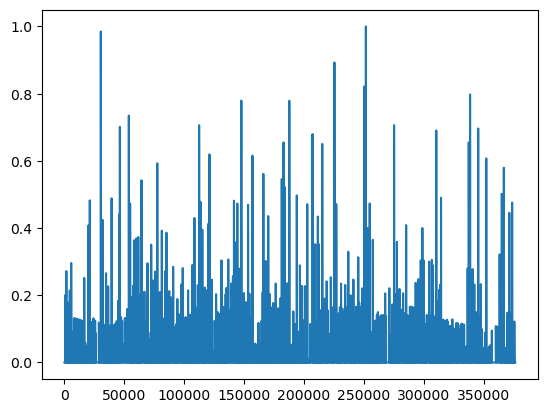

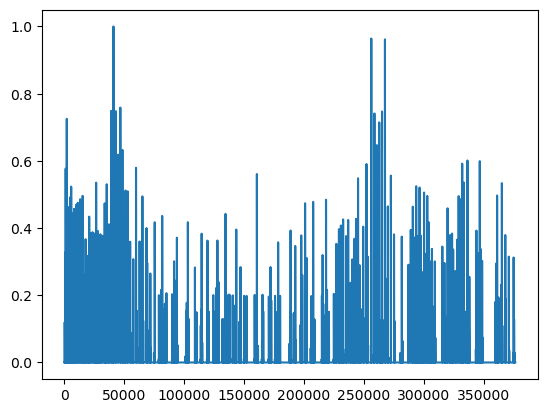

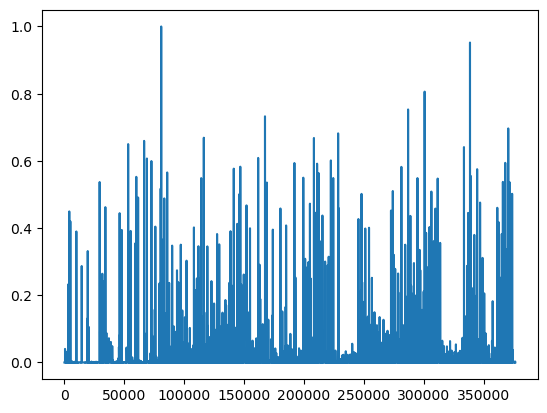

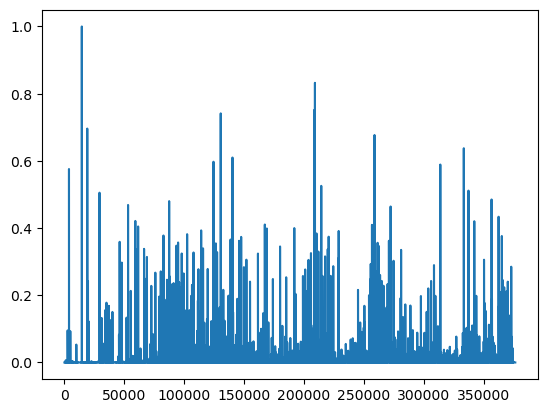

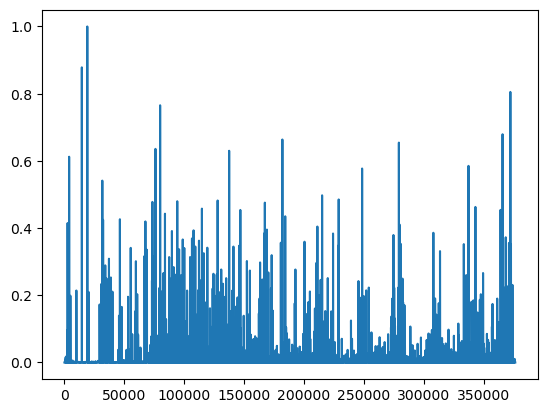

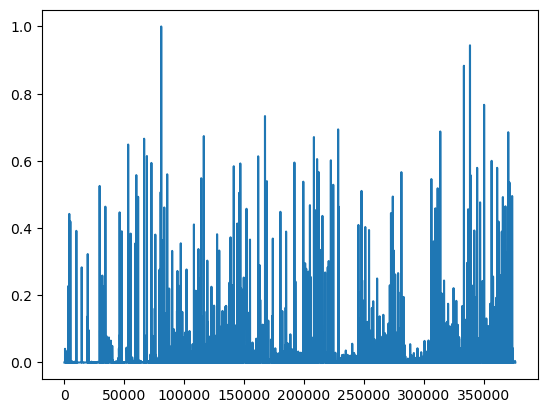

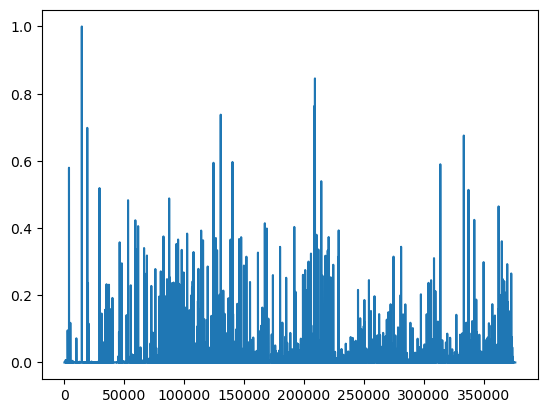

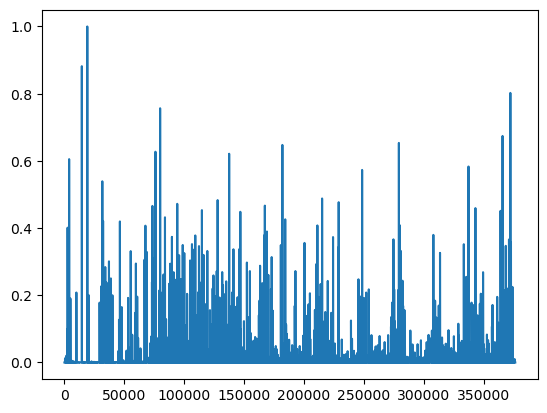

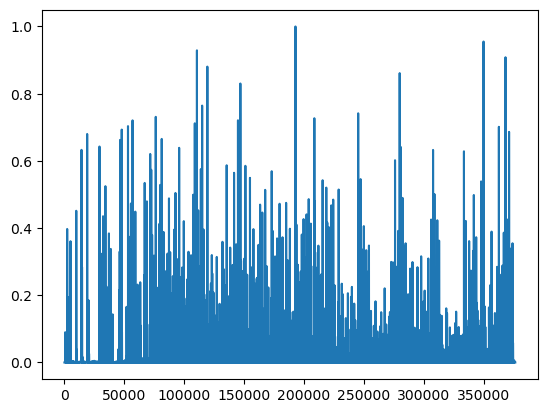

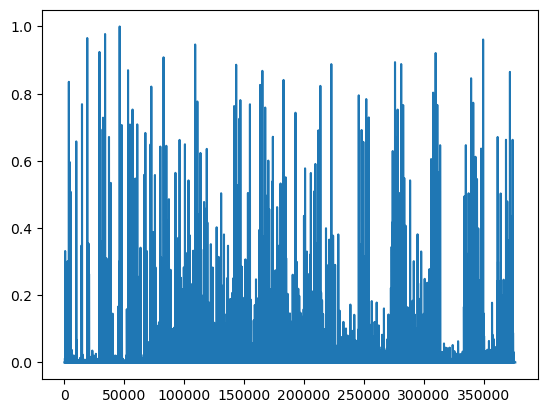

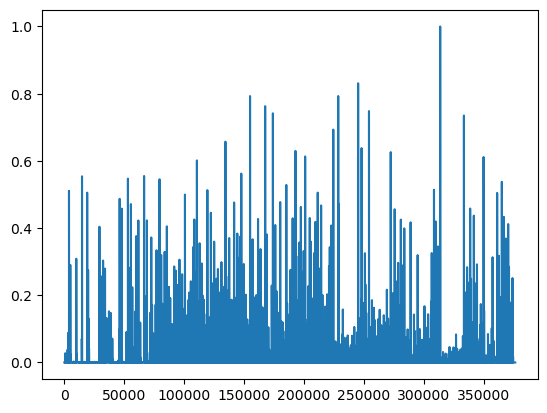

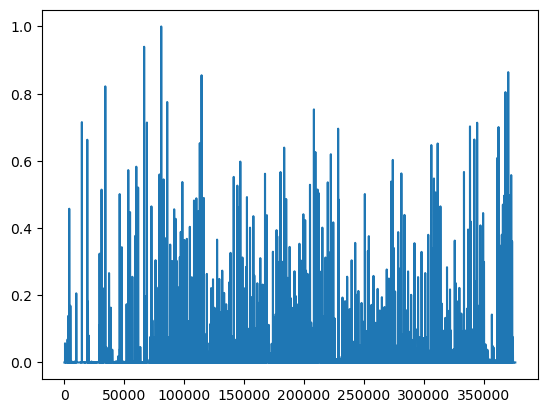

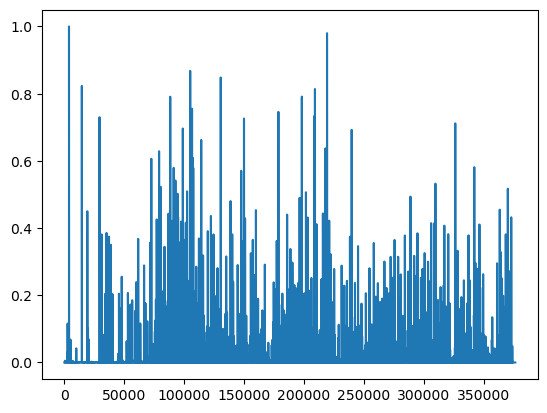

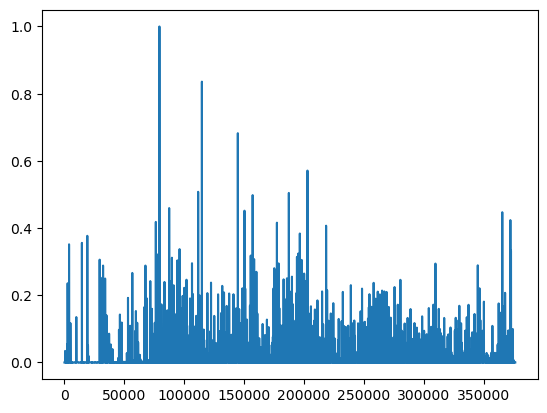

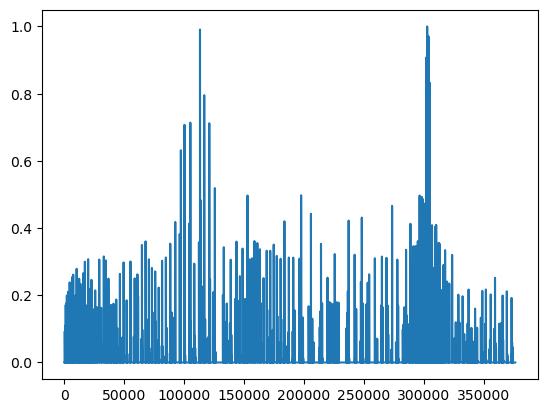

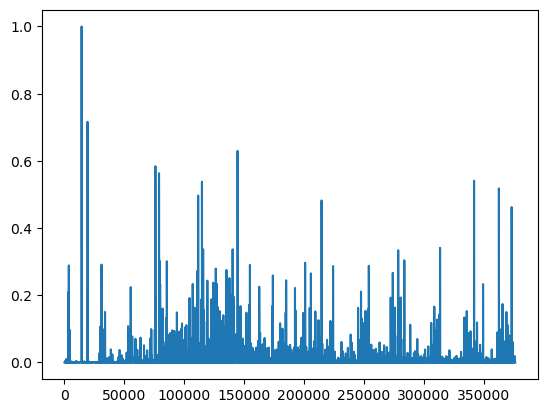

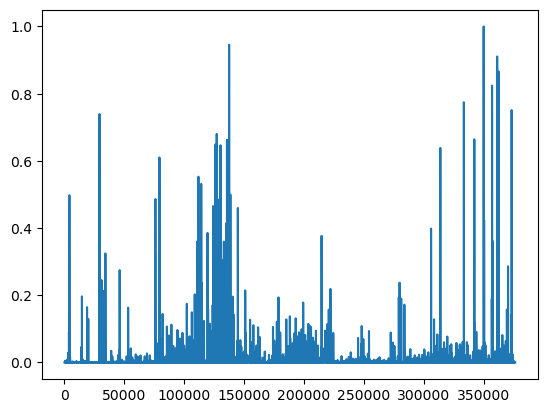

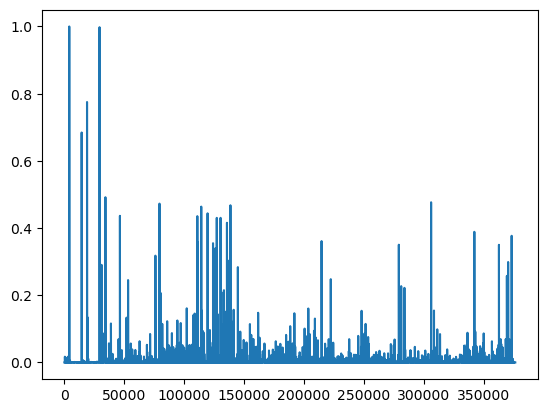

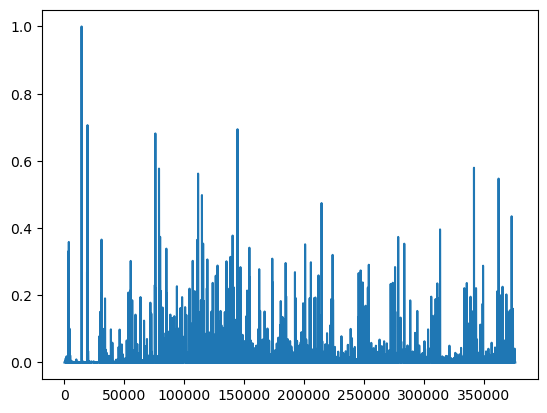

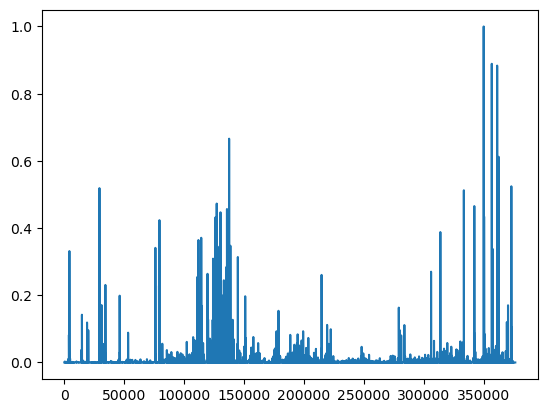

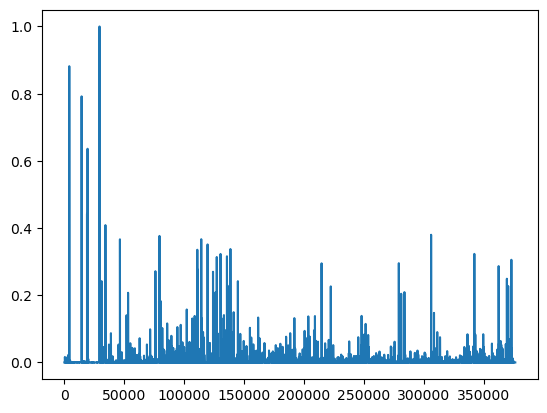

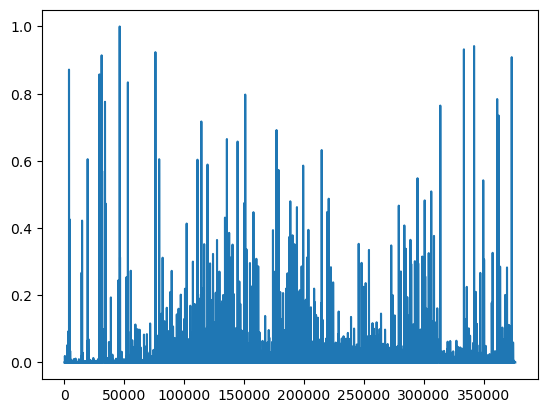

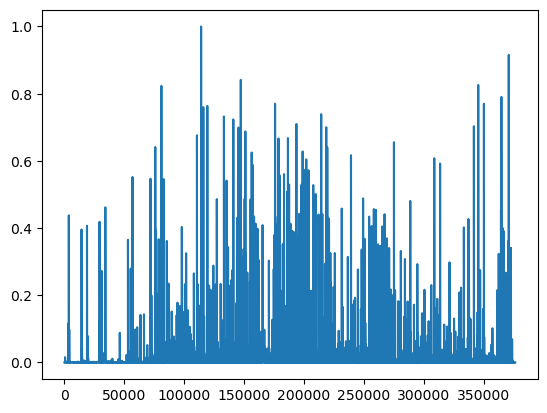

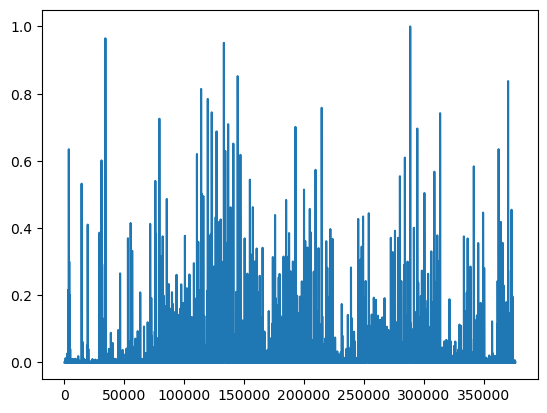

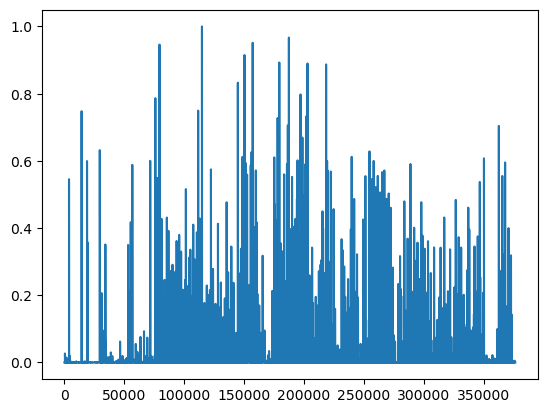

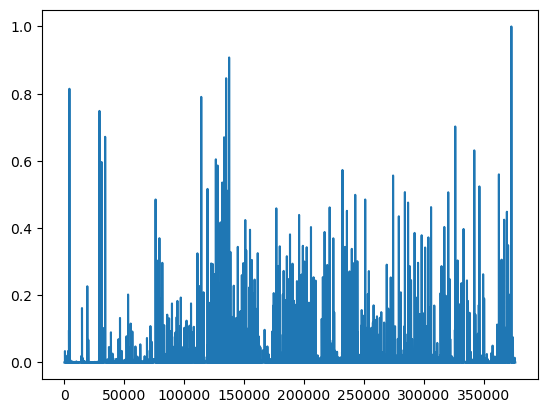

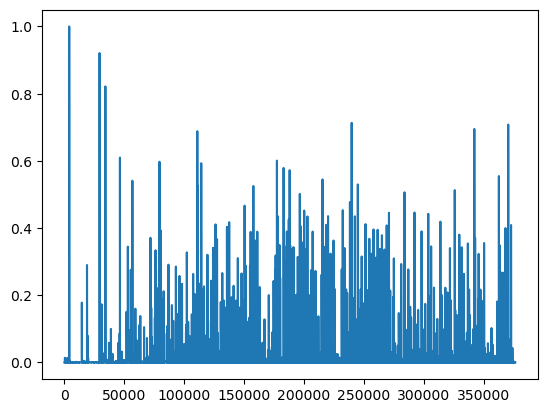

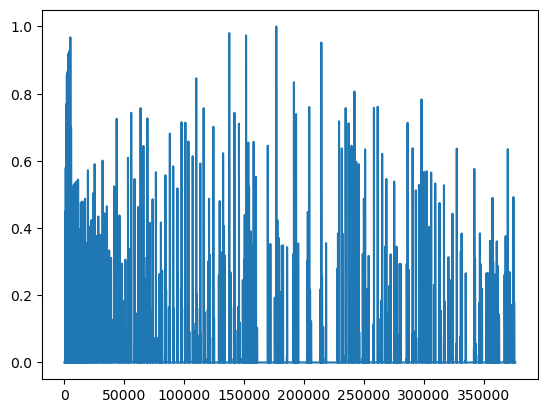

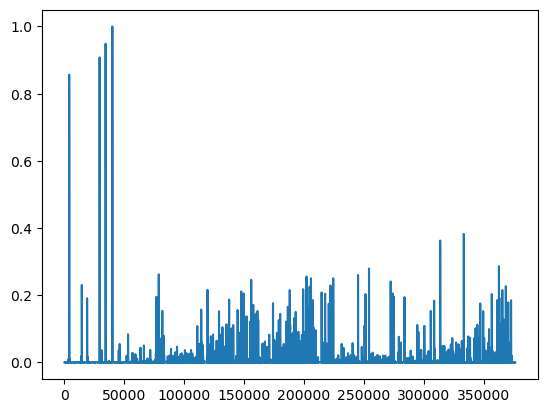

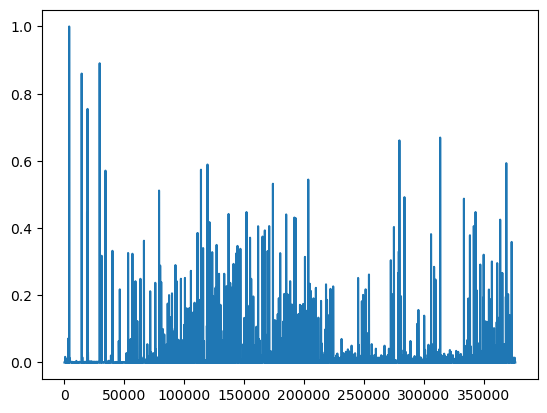

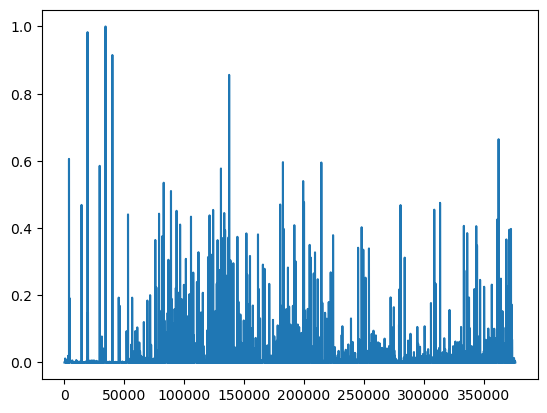

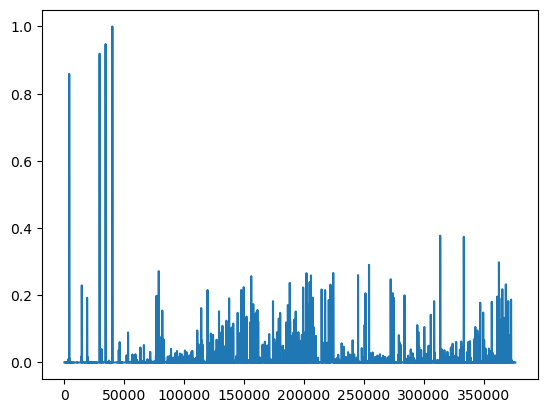

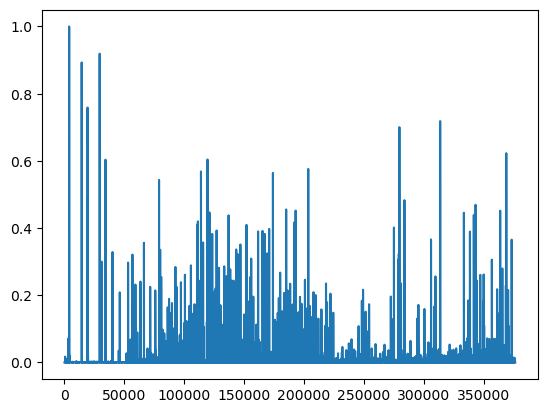

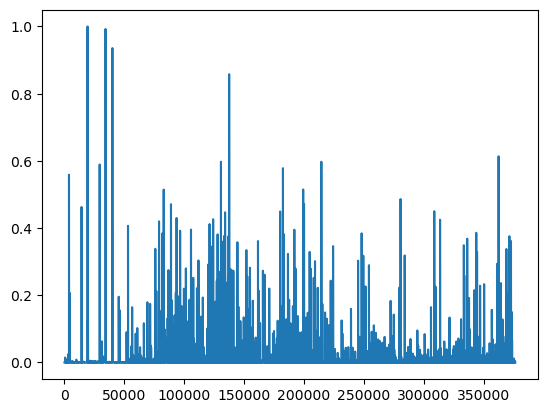

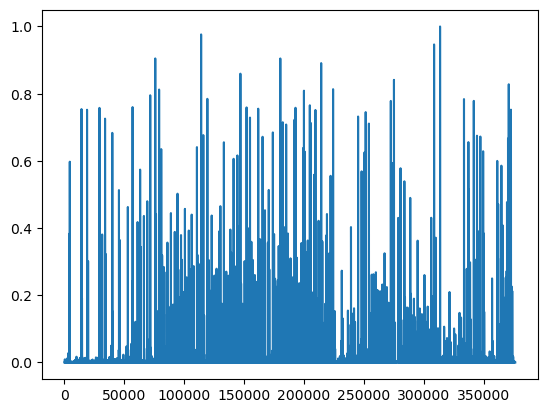

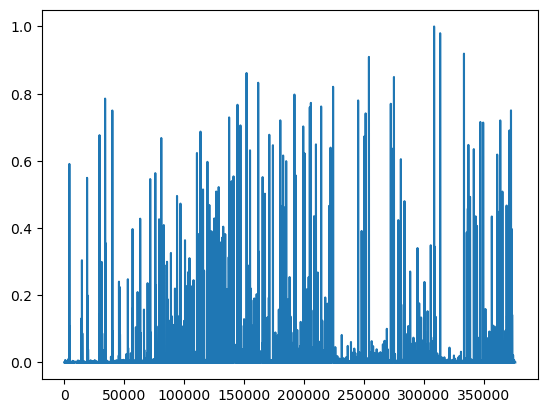

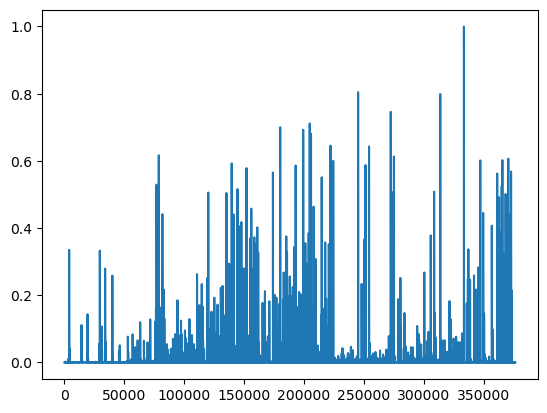

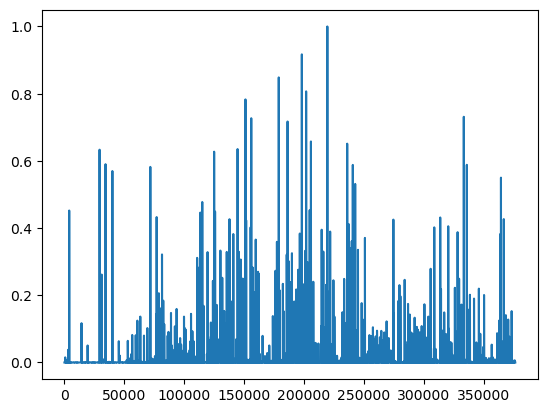

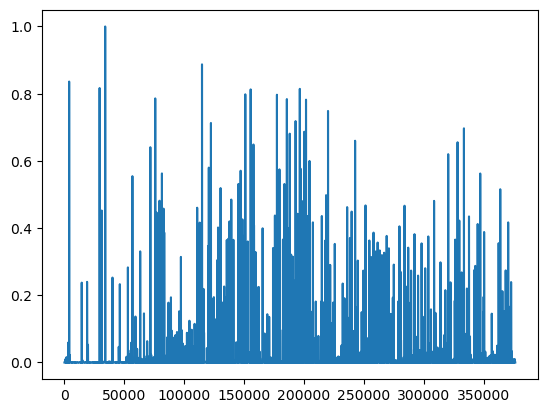

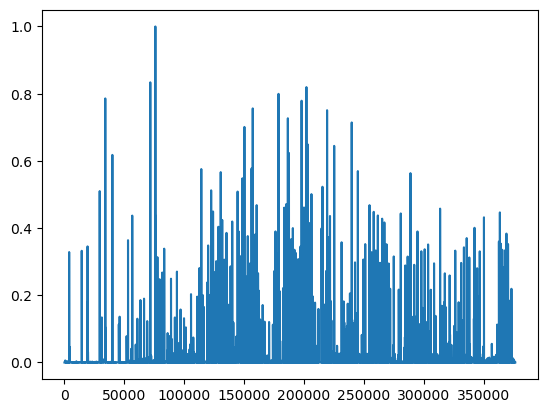

In [107]:
for cp in change_points:
    plt.plot(cp)
    plt.show()

## Set parameters

In [93]:
window_size = 150
domain = "both" #choose from: TD (time domain), FD (frequency domain) or both

#parameters TD
intermediate_dim_TD=0
latent_dim_TD=1 #h^TD in paper
nr_shared_TD=1 #s^TD in paper
K_TD = 2 #as in paper
nr_ae_TD= K_TD+1 #number of parallel AEs = K+1
loss_weight_TD=1 #lambda_TD in paper

#parameters FD
intermediate_dim_FD=10
latent_dim_FD=1 #h^FD in paper
nr_shared_FD=1 #s^FD in paper
K_FD = 2 #as in paper
nr_ae_FD=K_FD+1 #number of parallel AEs = K+1
loss_weight_FD=1 #lambda^FD in paper
nfft = 30 #number of points for DFT
norm_mode = "timeseries" #for calculation of DFT, should the timeseries have mean zero or each window?

## Generate data

In [94]:
#timeseries, windows_TD, parameters = simulate.generate_jumpingmean(window_size)
windows_FD = utils.calc_fft(windows_TD, nfft, norm_mode)

# plt.figure(figsize=(15,4))
# plt.plot(timeseries)
# plt.show()
# plt.figure(figsize=(15,4))
# plt.plot(range(4000,4500),timeseries[4000:4500])
# plt.show()

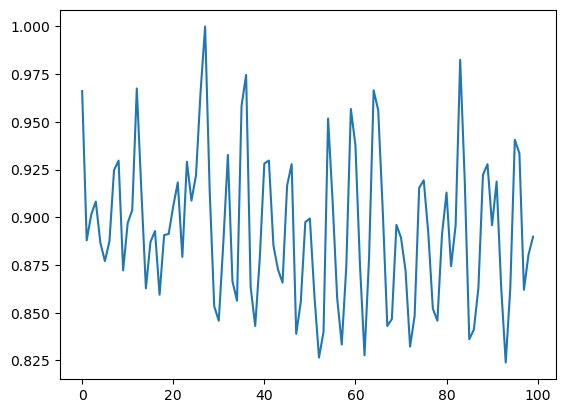

In [67]:
plt.plot(windows_TD[-1])

In [64]:
len(parameters)

4906

In [48]:
len(windows_TD)

4807

In [49]:
len(timeseries)

4906

In [50]:
len(windows_TD)

4807

## Train the autoencoders

In [95]:
shared_features_TD = TIRE.train_AE(windows_TD, intermediate_dim_TD, latent_dim_TD, nr_shared_TD, nr_ae_TD, loss_weight_TD)
shared_features_FD = TIRE.train_AE(windows_FD, intermediate_dim_FD, latent_dim_FD, nr_shared_FD, nr_ae_FD, loss_weight_FD)

Model: "model_30"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_21 (InputLayer)          [(None, 3, 50)]      0           []                               
                                                                                                  
 dense_40 (Dense)               (None, 3, 1)         51          ['input_21[0][0]']               
                                                                                                  
 dense_41 (Dense)               (None, 3, 0)         0           ['input_21[0][0]']               
                                                                                                  
 tf.concat_10 (TFOpLambda)      (None, 3, 1)         0           ['dense_40[0][0]',               
                                                                  'dense_41[0][0]']        

5881/5881 [==============================] - 4s 651us/step - loss: 0.0023
Epoch 77/200
5881/5881 [==============================] - 4s 636us/step - loss: 0.0023
Epoch 78/200
5881/5881 [==============================] - 4s 649us/step - loss: 0.0023
Epoch 79/200
5881/5881 [==============================] - 4s 640us/step - loss: 0.0023
Epoch 80/200
5881/5881 [==============================] - 4s 634us/step - loss: 0.0023
Epoch 81/200
5881/5881 [==============================] - 4s 616us/step - loss: 0.0023
Epoch 82/200
5881/5881 [==============================] - 4s 624us/step - loss: 0.0023
Epoch 83/200
5881/5881 [==============================] - 4s 613us/step - loss: 0.0023
Epoch 84/200
5881/5881 [==============================] - 4s 619us/step - loss: 0.0023
Epoch 85/200
5881/5881 [==============================] - 4s 606us/step - loss: 0.0023
Epoch 86/200
5881/5881 [==============================] - 4s 621us/step - loss: 0.0023
Epoch 87/200
5881/5881 [==============================] 

5881/5881 [==============================] - 4s 635us/step - loss: 5.9455e-05
Epoch 38/200
5881/5881 [==============================] - 4s 640us/step - loss: 5.9331e-05
Epoch 39/200
5881/5881 [==============================] - 4s 633us/step - loss: 5.8995e-05
Epoch 40/200
5881/5881 [==============================] - 4s 635us/step - loss: 5.9016e-05
Epoch 41/200
5881/5881 [==============================] - 4s 656us/step - loss: 5.9055e-05
Epoch 42/200
5881/5881 [==============================] - 4s 668us/step - loss: 5.8788e-05
Epoch 43/200
5881/5881 [==============================] - 4s 642us/step - loss: 5.8652e-05
Epoch 44/200
5881/5881 [==============================] - 4s 689us/step - loss: 5.1791e-05
Epoch 45/200
5881/5881 [==============================] - 4s 629us/step - loss: 4.2821e-05
Epoch 46/200
5881/5881 [==============================] - 4s 620us/step - loss: 3.9710e-05
Epoch 47/200
5881/5881 [==============================] - 4s 631us/step - loss: 3.7101e-05
Epoch 48/200

## Postprocessing and peak detection

In [96]:
#we calculate the smoothened dissimilarity measure and the corresponding prominence-based change point scores
dissimilarities = TIRE.smoothened_dissimilarity_measures(shared_features_TD, shared_features_FD, domain, window_size)
change_point_scores = TIRE.change_point_score(dissimilarities, window_size)

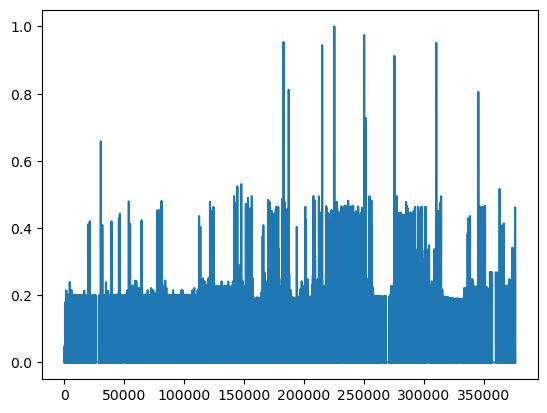

In [97]:
plt.plot(change_point_scores)

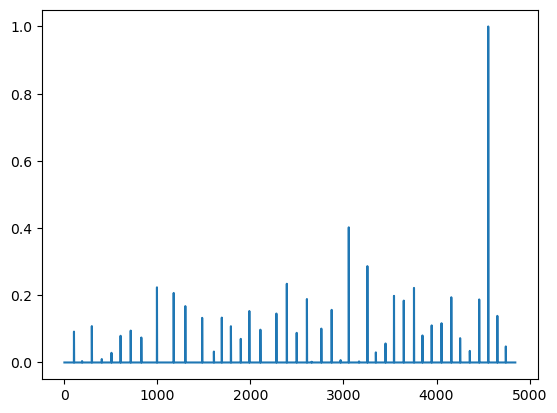

In [29]:
plt.plot(change_point_scores)

In [9]:
len(change_point_scores)

4891

In [13]:
for cp in change_point_scores:
    print(cp)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.06434489186439922
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.09483356732474237
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0011681170589762438
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.06533686753904083
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0002952076565381951
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


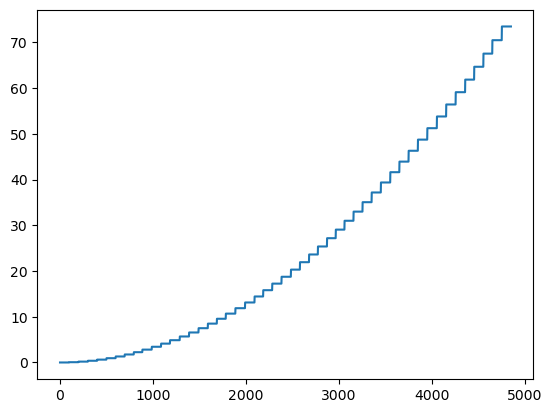

In [30]:
plt.plot(parameters)

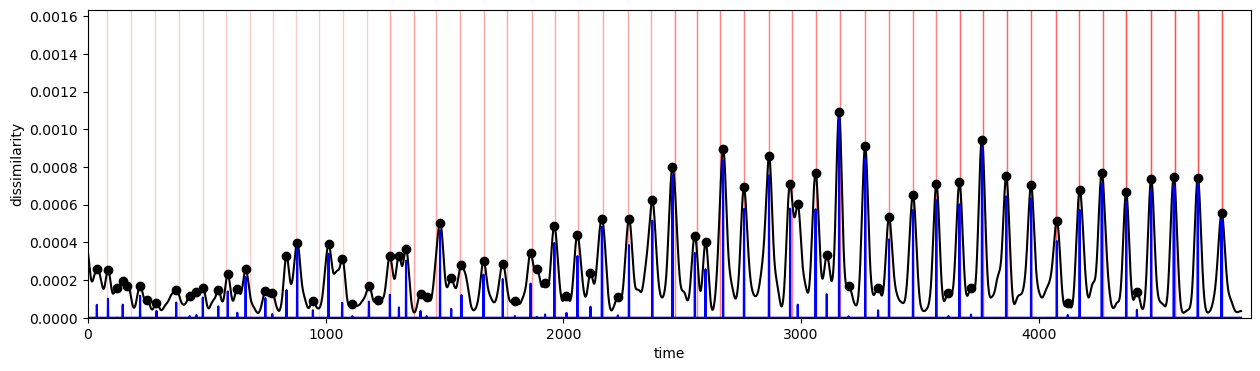

[0.550891906353687, 0.8743445310388827, 0.9183974317101846]


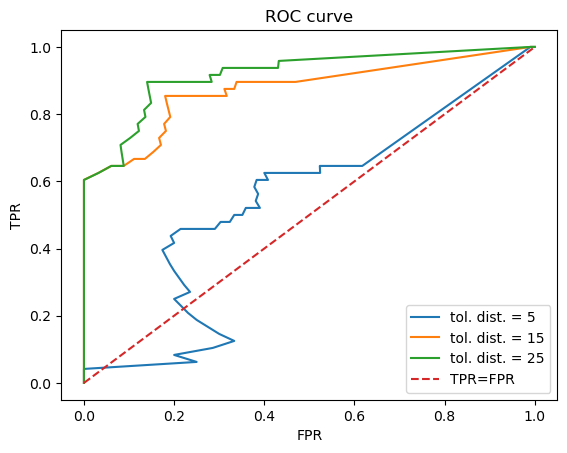

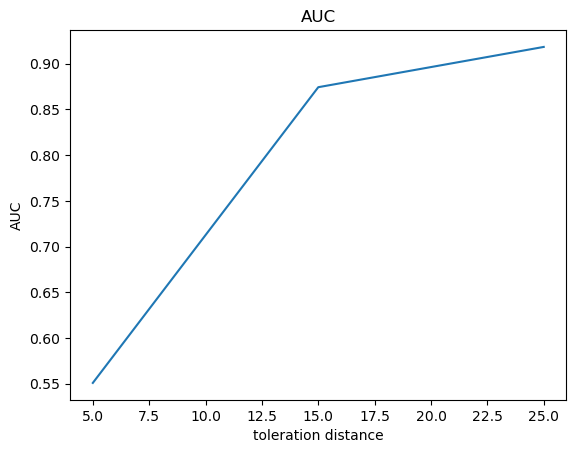

In [15]:
#parameters for plot
time_start = 0
time_stop = len(timeseries)
plot_prominences = True

utils.plot_cp(dissimilarities, parameters, window_size, time_start, time_stop, plot_prominences)

#parameters for AUC calculation
tol_distances = [5,15,25]
auc = utils.get_auc(dissimilarities,tol_distances, parameters, window_size)